In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [2]:
df = pd.read_csv("train_FD002.txt",sep=" ",
                 
    names=["unit_number","time","sen1","sen2","sen3","T2","T24","T30","T50","P2","P15","P30","Nf","Nc","epr","Ps30","phi","NRf","NRc","BPR","farB","htBleed","Nf_dmd","PCNfR_dmd","W31","W32","null1","null2"])

In [3]:
df.dropna(inplace=True,axis=1)

In [4]:
df.head()

unit_number  time     sen1    sen2   sen3      T2     T24      T30  \
0            1     1  34.9983  0.8400  100.0  449.44  555.32  1358.61   
1            1     2  41.9982  0.8408  100.0  445.00  549.90  1353.22   
2            1     3  24.9988  0.6218   60.0  462.54  537.31  1256.76   
3            1     4  42.0077  0.8416  100.0  445.00  549.51  1354.03   
4            1     5  25.0005  0.6203   60.0  462.54  537.07  1257.71   

       T50    P2  ...     phi      NRf      NRc      BPR  farB  htBleed  \
0  1137.23  5.48  ...  183.06  2387.72  8048.56   9.3461  0.02      334   
1  1125.78  3.91  ...  130.42  2387.66  8072.30   9.3774  0.02      330   
2  1047.45  7.05  ...  164.22  2028.03  7864.87  10.8941  0.02      309   
3  1126.38  3.91  ...  130.72  2387.61  8068.66   9.3528  0.02      329   
4  1047.93  7.05  ...  164.31  2028.00  7861.23  10.8963  0.02      309   

   Nf_dmd  PCNfR_dmd    W31     W32  
0    2223     100.00  14.73  8.8071  
1    2212     100.00  10.41  6.2665  
2    1915      84.93  14.08  8.6723  
3    2212     100.00  10.59  6.4701  
4    1915      84.93  14.13  8.5286  

[5 rows x 26 columns]

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(6)
kmeans.fit(df[["sen1","sen2","sen3"]])

KMeans(n_clusters=6)

In [7]:
cluster = kmeans.fit_predict(df[["sen1","sen2","sen3"]])

In [8]:
df["cluster"] = cluster

In [9]:
df.head()

unit_number  time     sen1    sen2   sen3      T2     T24      T30  \
0            1     1  34.9983  0.8400  100.0  449.44  555.32  1358.61   
1            1     2  41.9982  0.8408  100.0  445.00  549.90  1353.22   
2            1     3  24.9988  0.6218   60.0  462.54  537.31  1256.76   
3            1     4  42.0077  0.8416  100.0  445.00  549.51  1354.03   
4            1     5  25.0005  0.6203   60.0  462.54  537.07  1257.71   

       T50    P2  ...      NRf      NRc      BPR  farB  htBleed  Nf_dmd  \
0  1137.23  5.48  ...  2387.72  8048.56   9.3461  0.02      334    2223   
1  1125.78  3.91  ...  2387.66  8072.30   9.3774  0.02      330    2212   
2  1047.45  7.05  ...  2028.03  7864.87  10.8941  0.02      309    1915   
3  1126.38  3.91  ...  2387.61  8068.66   9.3528  0.02      329    2212   
4  1047.93  7.05  ...  2028.00  7861.23  10.8963  0.02      309    1915   

   PCNfR_dmd    W31     W32  cluster  
0     100.00  14.73  8.8071        5  
1     100.00  10.41  6.2665        1  
2      84.93  14.08  8.6723        2  
3     100.00  10.59  6.4701        1  
4      84.93  14.13  8.5286        2  

[5 rows x 27 columns]

In [10]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'cluster'],
      dtype='object')

In [11]:
cols = df.columns.tolist()[-1:] + df.columns.tolist()[:-1] 
cols

['cluster',
 'unit_number',
 'time',
 'sen1',
 'sen2',
 'sen3',
 'T2',
 'T24',
 'T30',
 'T50',
 'P2',
 'P15',
 'P30',
 'Nf',
 'Nc',
 'epr',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'farB',
 'htBleed',
 'Nf_dmd',
 'PCNfR_dmd',
 'W31',
 'W32']

In [12]:
df = df[cols]

In [13]:
v = set(df["cluster"])
d = {}
for name in v:
    d[name] = pd.DataFrame(data= df.loc[df["cluster"] == name],columns=df.columns.tolist())
    
for x in v:
    d[x] = d[x][d[x].columns[6:]] - d[x][d[x].columns[6:]].mean()
    
mydicts = [d[i] for i in v]

ne_df = pd.concat(map(pd.DataFrame, mydicts), axis=0)

ne_df.sort_index(axis=0,inplace=True)

In [14]:
v = set(df["cluster"])

In [15]:
v

{0, 1, 2, 3, 4, 5}

In [16]:
ne_df.head()

T2       T24       T30       T50            P2       P15  \
0  5.684342e-14 -0.479163 -8.103352  5.699251 -1.776357e-15 -0.000296   
1  0.000000e+00  0.195119 -1.243034 -2.022495  1.332268e-15 -0.005840   
2  0.000000e+00  0.444931 -5.924786 -2.870924  1.776357e-15 -0.007761   
3  0.000000e+00 -0.194881 -0.433034 -1.422495  1.332268e-15 -0.005840   
4  0.000000e+00  0.204931 -4.974786 -2.390924  1.776357e-15  0.002239   

        P30        Nf         Nc       epr  ...       phi       NRf  \
0  0.196593 -0.390616 -14.193228 -0.000391  ...  0.036738 -0.418173   
1 -0.120382 -0.401548 -23.929811 -0.000244  ... -0.129504 -0.392269   
2  0.284048 -0.305771 -14.078543  0.000079  ... -0.352178 -0.284200   
3 -0.170382 -0.391548 -23.929811 -0.000244  ...  0.170496 -0.442269   
4 -0.375952 -0.315771 -22.268543  0.000079  ... -0.262178 -0.314200   

         NRc       BPR          farB   htBleed  Nf_dmd     PCNfR_dmd  \
0 -23.639063  0.013802  3.469447e-18 -0.235038     0.0  0.000000e+00   
1 -17.138359  0.002345  3.469447e-18 -1.066503     0.0  0.000000e+00   
2 -13.591663 -0.019864  0.000000e+00  1.651837     0.0 -1.421085e-14   
3 -20.778359 -0.022255  3.469447e-18 -2.066503     0.0  0.000000e+00   
4 -17.231663 -0.017664  0.000000e+00  1.651837     0.0 -1.421085e-14   

        W31       W32  
0 -0.100771 -0.090800  
1 -0.176419 -0.084738  
2 -0.182839  0.113846  
3  0.003581  0.118862  
4 -0.132839 -0.029854  

[5 rows x 21 columns]

In [17]:
ne_df[["unit_number","time","sen1","sen2","sen3","cluster"]] = df[["unit_number","time","sen1","sen2","sen3","cluster"]]

In [18]:
ne_df.head()

T2       T24       T30       T50            P2       P15  \
0  5.684342e-14 -0.479163 -8.103352  5.699251 -1.776357e-15 -0.000296   
1  0.000000e+00  0.195119 -1.243034 -2.022495  1.332268e-15 -0.005840   
2  0.000000e+00  0.444931 -5.924786 -2.870924  1.776357e-15 -0.007761   
3  0.000000e+00 -0.194881 -0.433034 -1.422495  1.332268e-15 -0.005840   
4  0.000000e+00  0.204931 -4.974786 -2.390924  1.776357e-15  0.002239   

        P30        Nf         Nc       epr  ...  Nf_dmd     PCNfR_dmd  \
0  0.196593 -0.390616 -14.193228 -0.000391  ...     0.0  0.000000e+00   
1 -0.120382 -0.401548 -23.929811 -0.000244  ...     0.0  0.000000e+00   
2  0.284048 -0.305771 -14.078543  0.000079  ...     0.0 -1.421085e-14   
3 -0.170382 -0.391548 -23.929811 -0.000244  ...     0.0  0.000000e+00   
4 -0.375952 -0.315771 -22.268543  0.000079  ...     0.0 -1.421085e-14   

        W31       W32  unit_number  time     sen1    sen2   sen3  cluster  
0 -0.100771 -0.090800            1     1  34.9983  0.8400  100.0        5  
1 -0.176419 -0.084738            1     2  41.9982  0.8408  100.0        1  
2 -0.182839  0.113846            1     3  24.9988  0.6218   60.0        2  
3  0.003581  0.118862            1     4  42.0077  0.8416  100.0        1  
4 -0.132839 -0.029854            1     5  25.0005  0.6203   60.0        2  

[5 rows x 27 columns]

In [19]:
cols = ne_df.columns.tolist()[-6:-1] + ne_df.columns.tolist()[:-6] + ne_df.columns.tolist()[-1:]
cols

['unit_number',
 'time',
 'sen1',
 'sen2',
 'sen3',
 'T2',
 'T24',
 'T30',
 'T50',
 'P2',
 'P15',
 'P30',
 'Nf',
 'Nc',
 'epr',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'farB',
 'htBleed',
 'Nf_dmd',
 'PCNfR_dmd',
 'W31',
 'W32',
 'cluster']

In [20]:
ne_df = ne_df[cols]

In [21]:
ne_df.head()

unit_number  time     sen1    sen2   sen3            T2       T24  \
0            1     1  34.9983  0.8400  100.0  5.684342e-14 -0.479163   
1            1     2  41.9982  0.8408  100.0  0.000000e+00  0.195119   
2            1     3  24.9988  0.6218   60.0  0.000000e+00  0.444931   
3            1     4  42.0077  0.8416  100.0  0.000000e+00 -0.194881   
4            1     5  25.0005  0.6203   60.0  0.000000e+00  0.204931   

        T30       T50            P2  ...       NRf        NRc       BPR  \
0 -8.103352  5.699251 -1.776357e-15  ... -0.418173 -23.639063  0.013802   
1 -1.243034 -2.022495  1.332268e-15  ... -0.392269 -17.138359  0.002345   
2 -5.924786 -2.870924  1.776357e-15  ... -0.284200 -13.591663 -0.019864   
3 -0.433034 -1.422495  1.332268e-15  ... -0.442269 -20.778359 -0.022255   
4 -4.974786 -2.390924  1.776357e-15  ... -0.314200 -17.231663 -0.017664   

           farB   htBleed  Nf_dmd     PCNfR_dmd       W31       W32  cluster  
0  3.469447e-18 -0.235038     0.0  0.000000e+00 -0.100771 -0.090800        5  
1  3.469447e-18 -1.066503     0.0  0.000000e+00 -0.176419 -0.084738        1  
2  0.000000e+00  1.651837     0.0 -1.421085e-14 -0.182839  0.113846        2  
3  3.469447e-18 -2.066503     0.0  0.000000e+00  0.003581  0.118862        1  
4  0.000000e+00  1.651837     0.0 -1.421085e-14 -0.132839 -0.029854        2  

[5 rows x 27 columns]

In [22]:
from sklearn.preprocessing import scale

In [23]:
ne_df.head()

unit_number  time     sen1    sen2   sen3            T2       T24  \
0            1     1  34.9983  0.8400  100.0  5.684342e-14 -0.479163   
1            1     2  41.9982  0.8408  100.0  0.000000e+00  0.195119   
2            1     3  24.9988  0.6218   60.0  0.000000e+00  0.444931   
3            1     4  42.0077  0.8416  100.0  0.000000e+00 -0.194881   
4            1     5  25.0005  0.6203   60.0  0.000000e+00  0.204931   

        T30       T50            P2  ...       NRf        NRc       BPR  \
0 -8.103352  5.699251 -1.776357e-15  ... -0.418173 -23.639063  0.013802   
1 -1.243034 -2.022495  1.332268e-15  ... -0.392269 -17.138359  0.002345   
2 -5.924786 -2.870924  1.776357e-15  ... -0.284200 -13.591663 -0.019864   
3 -0.433034 -1.422495  1.332268e-15  ... -0.442269 -20.778359 -0.022255   
4 -4.974786 -2.390924  1.776357e-15  ... -0.314200 -17.231663 -0.017664   

           farB   htBleed  Nf_dmd     PCNfR_dmd       W31       W32  cluster  
0  3.469447e-18 -0.235038     0.0  0.000000e+00 -0.100771 -0.090800        5  
1  3.469447e-18 -1.066503     0.0  0.000000e+00 -0.176419 -0.084738        1  
2  0.000000e+00  1.651837     0.0 -1.421085e-14 -0.182839  0.113846        2  
3  3.469447e-18 -2.066503     0.0  0.000000e+00  0.003581  0.118862        1  
4  0.000000e+00  1.651837     0.0 -1.421085e-14 -0.132839 -0.029854        2  

[5 rows x 27 columns]

In [24]:
x_scaled = ne_df[[ 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']]

x_scale_df = preprocessing.scale(x_scaled)
x_scale_df

array([[ 0.3179195 , -1.07696097, -1.42503785, ...,  0.41818698,
        -0.76628186, -1.1625381 ],
       [-0.26289456,  0.4385472 , -0.21859723, ...,  0.41818698,
        -1.34151965, -1.08493057],
       [-0.26289456,  1.00002293, -1.04192003, ..., -2.39127486,
        -1.3903388 ,  1.45760868],
       ...,
       [-0.26289456,  1.38211317,  2.38379039, ..., -2.39127486,
        -0.55388145, -0.10439634],
       [-0.26289456,  2.19124546,  1.80521815, ..., -2.39127486,
        -1.61846353, -2.37570528],
       [ 0.3179195 ,  1.88985741,  1.38868734, ...,  0.41818698,
        -0.61419871, -0.6824136 ]])

In [25]:
df_scaled = pd.DataFrame(data=x_scale_df,columns=ne_df.columns[5:-1].tolist())

In [26]:
df_scaled.head()

T2       T24       T30       T50        P2       P15       P30  \
0  0.317920 -1.076961 -1.425038  0.726241 -0.953480 -0.073869  0.333198   
1 -0.262895  0.438547 -0.218597 -0.257721  0.652595 -1.456683 -0.204031   
2 -0.262895  1.000023 -1.041920 -0.365834  0.882035 -1.935848  0.481422   
3 -0.262895 -0.438013 -0.076152 -0.181265  0.652595 -1.456683 -0.288774   
4 -0.262895  0.460601 -0.874855 -0.304669  0.882035  0.558621 -0.637187   

         Nf        Nc       epr  ...       phi       NRf       NRc       BPR  \
0 -1.767124 -0.813912 -0.197066  ...  0.076781 -1.770930 -1.516324  0.356253   
1 -1.816579 -1.372257 -0.123308  ... -0.270661 -1.661225 -1.099337  0.060533   
2 -1.383291 -0.807335  0.039712  ... -0.736044 -1.203564 -0.871835 -0.512728   
3 -1.771340 -1.372257 -0.123308  ...  0.356332 -1.872971 -1.332824 -0.574454   
4 -1.428530 -1.276992  0.039712  ... -0.547947 -1.330612 -1.105322 -0.455940   

           farB   htBleed  Nf_dmd  PCNfR_dmd       W31       W32  
0  4.289419e-15 -0.164349     0.0   0.418187 -0.766282 -1.162538  
1  4.289419e-15 -0.745746     0.0   0.418187 -1.341520 -1.084931  
2  2.113893e-15  1.155037     0.0  -2.391275 -1.390339  1.457609  
3  4.289419e-15 -1.444990     0.0   0.418187  0.027229  1.521825  
4  2.113893e-15  1.155037     0.0  -2.391275 -1.010131 -0.382228  

[5 rows x 21 columns]

In [27]:
df_scaled[['unit_number', 'time','sen1','sen2','sen3','cluster']] = ne_df[['unit_number', 'time','sen1','sen2','sen3','cluster']]

In [28]:
df_scaled.head()

T2       T24       T30       T50        P2       P15       P30  \
0  0.317920 -1.076961 -1.425038  0.726241 -0.953480 -0.073869  0.333198   
1 -0.262895  0.438547 -0.218597 -0.257721  0.652595 -1.456683 -0.204031   
2 -0.262895  1.000023 -1.041920 -0.365834  0.882035 -1.935848  0.481422   
3 -0.262895 -0.438013 -0.076152 -0.181265  0.652595 -1.456683 -0.288774   
4 -0.262895  0.460601 -0.874855 -0.304669  0.882035  0.558621 -0.637187   

         Nf        Nc       epr  ...  Nf_dmd  PCNfR_dmd       W31       W32  \
0 -1.767124 -0.813912 -0.197066  ...     0.0   0.418187 -0.766282 -1.162538   
1 -1.816579 -1.372257 -0.123308  ...     0.0   0.418187 -1.341520 -1.084931   
2 -1.383291 -0.807335  0.039712  ...     0.0  -2.391275 -1.390339  1.457609   
3 -1.771340 -1.372257 -0.123308  ...     0.0   0.418187  0.027229  1.521825   
4 -1.428530 -1.276992  0.039712  ...     0.0  -2.391275 -1.010131 -0.382228   

   unit_number  time     sen1    sen2   sen3  cluster  
0            1     1  34.9983  0.8400  100.0        5  
1            1     2  41.9982  0.8408  100.0        1  
2            1     3  24.9988  0.6218   60.0        2  
3            1     4  42.0077  0.8416  100.0        1  
4            1     5  25.0005  0.6203   60.0        2  

[5 rows x 27 columns]

In [29]:
cols = df_scaled.columns.tolist()[-6:-1] + df_scaled.columns.tolist()[:-6] + df_scaled.columns.tolist()[-1:]
cols

['unit_number',
 'time',
 'sen1',
 'sen2',
 'sen3',
 'T2',
 'T24',
 'T30',
 'T50',
 'P2',
 'P15',
 'P30',
 'Nf',
 'Nc',
 'epr',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'farB',
 'htBleed',
 'Nf_dmd',
 'PCNfR_dmd',
 'W31',
 'W32',
 'cluster']

In [30]:
df_scaled= df_scaled[cols]

In [31]:
df_scaled.head()

unit_number  time     sen1    sen2   sen3        T2       T24       T30  \
0            1     1  34.9983  0.8400  100.0  0.317920 -1.076961 -1.425038   
1            1     2  41.9982  0.8408  100.0 -0.262895  0.438547 -0.218597   
2            1     3  24.9988  0.6218   60.0 -0.262895  1.000023 -1.041920   
3            1     4  42.0077  0.8416  100.0 -0.262895 -0.438013 -0.076152   
4            1     5  25.0005  0.6203   60.0 -0.262895  0.460601 -0.874855   

        T50        P2  ...       NRf       NRc       BPR          farB  \
0  0.726241 -0.953480  ... -1.770930 -1.516324  0.356253  4.289419e-15   
1 -0.257721  0.652595  ... -1.661225 -1.099337  0.060533  4.289419e-15   
2 -0.365834  0.882035  ... -1.203564 -0.871835 -0.512728  2.113893e-15   
3 -0.181265  0.652595  ... -1.872971 -1.332824 -0.574454  4.289419e-15   
4 -0.304669  0.882035  ... -1.330612 -1.105322 -0.455940  2.113893e-15   

    htBleed  Nf_dmd  PCNfR_dmd       W31       W32  cluster  
0 -0.164349     0.0   0.418187 -0.766282 -1.162538        5  
1 -0.745746     0.0   0.418187 -1.341520 -1.084931        1  
2  1.155037     0.0  -2.391275 -1.390339  1.457609        2  
3 -1.444990     0.0   0.418187  0.027229  1.521825        1  
4  1.155037     0.0  -2.391275 -1.010131 -0.382228        2  

[5 rows x 27 columns]

In [32]:
import random
v = random.sample(range(len(set(df_scaled["unit_number"]))), 15)

In [33]:
clus = {}
for name in v:
    clus[name] = pd.DataFrame(data= ne_df.loc[ne_df["unit_number"] == name],columns=ne_df.columns.tolist())
    

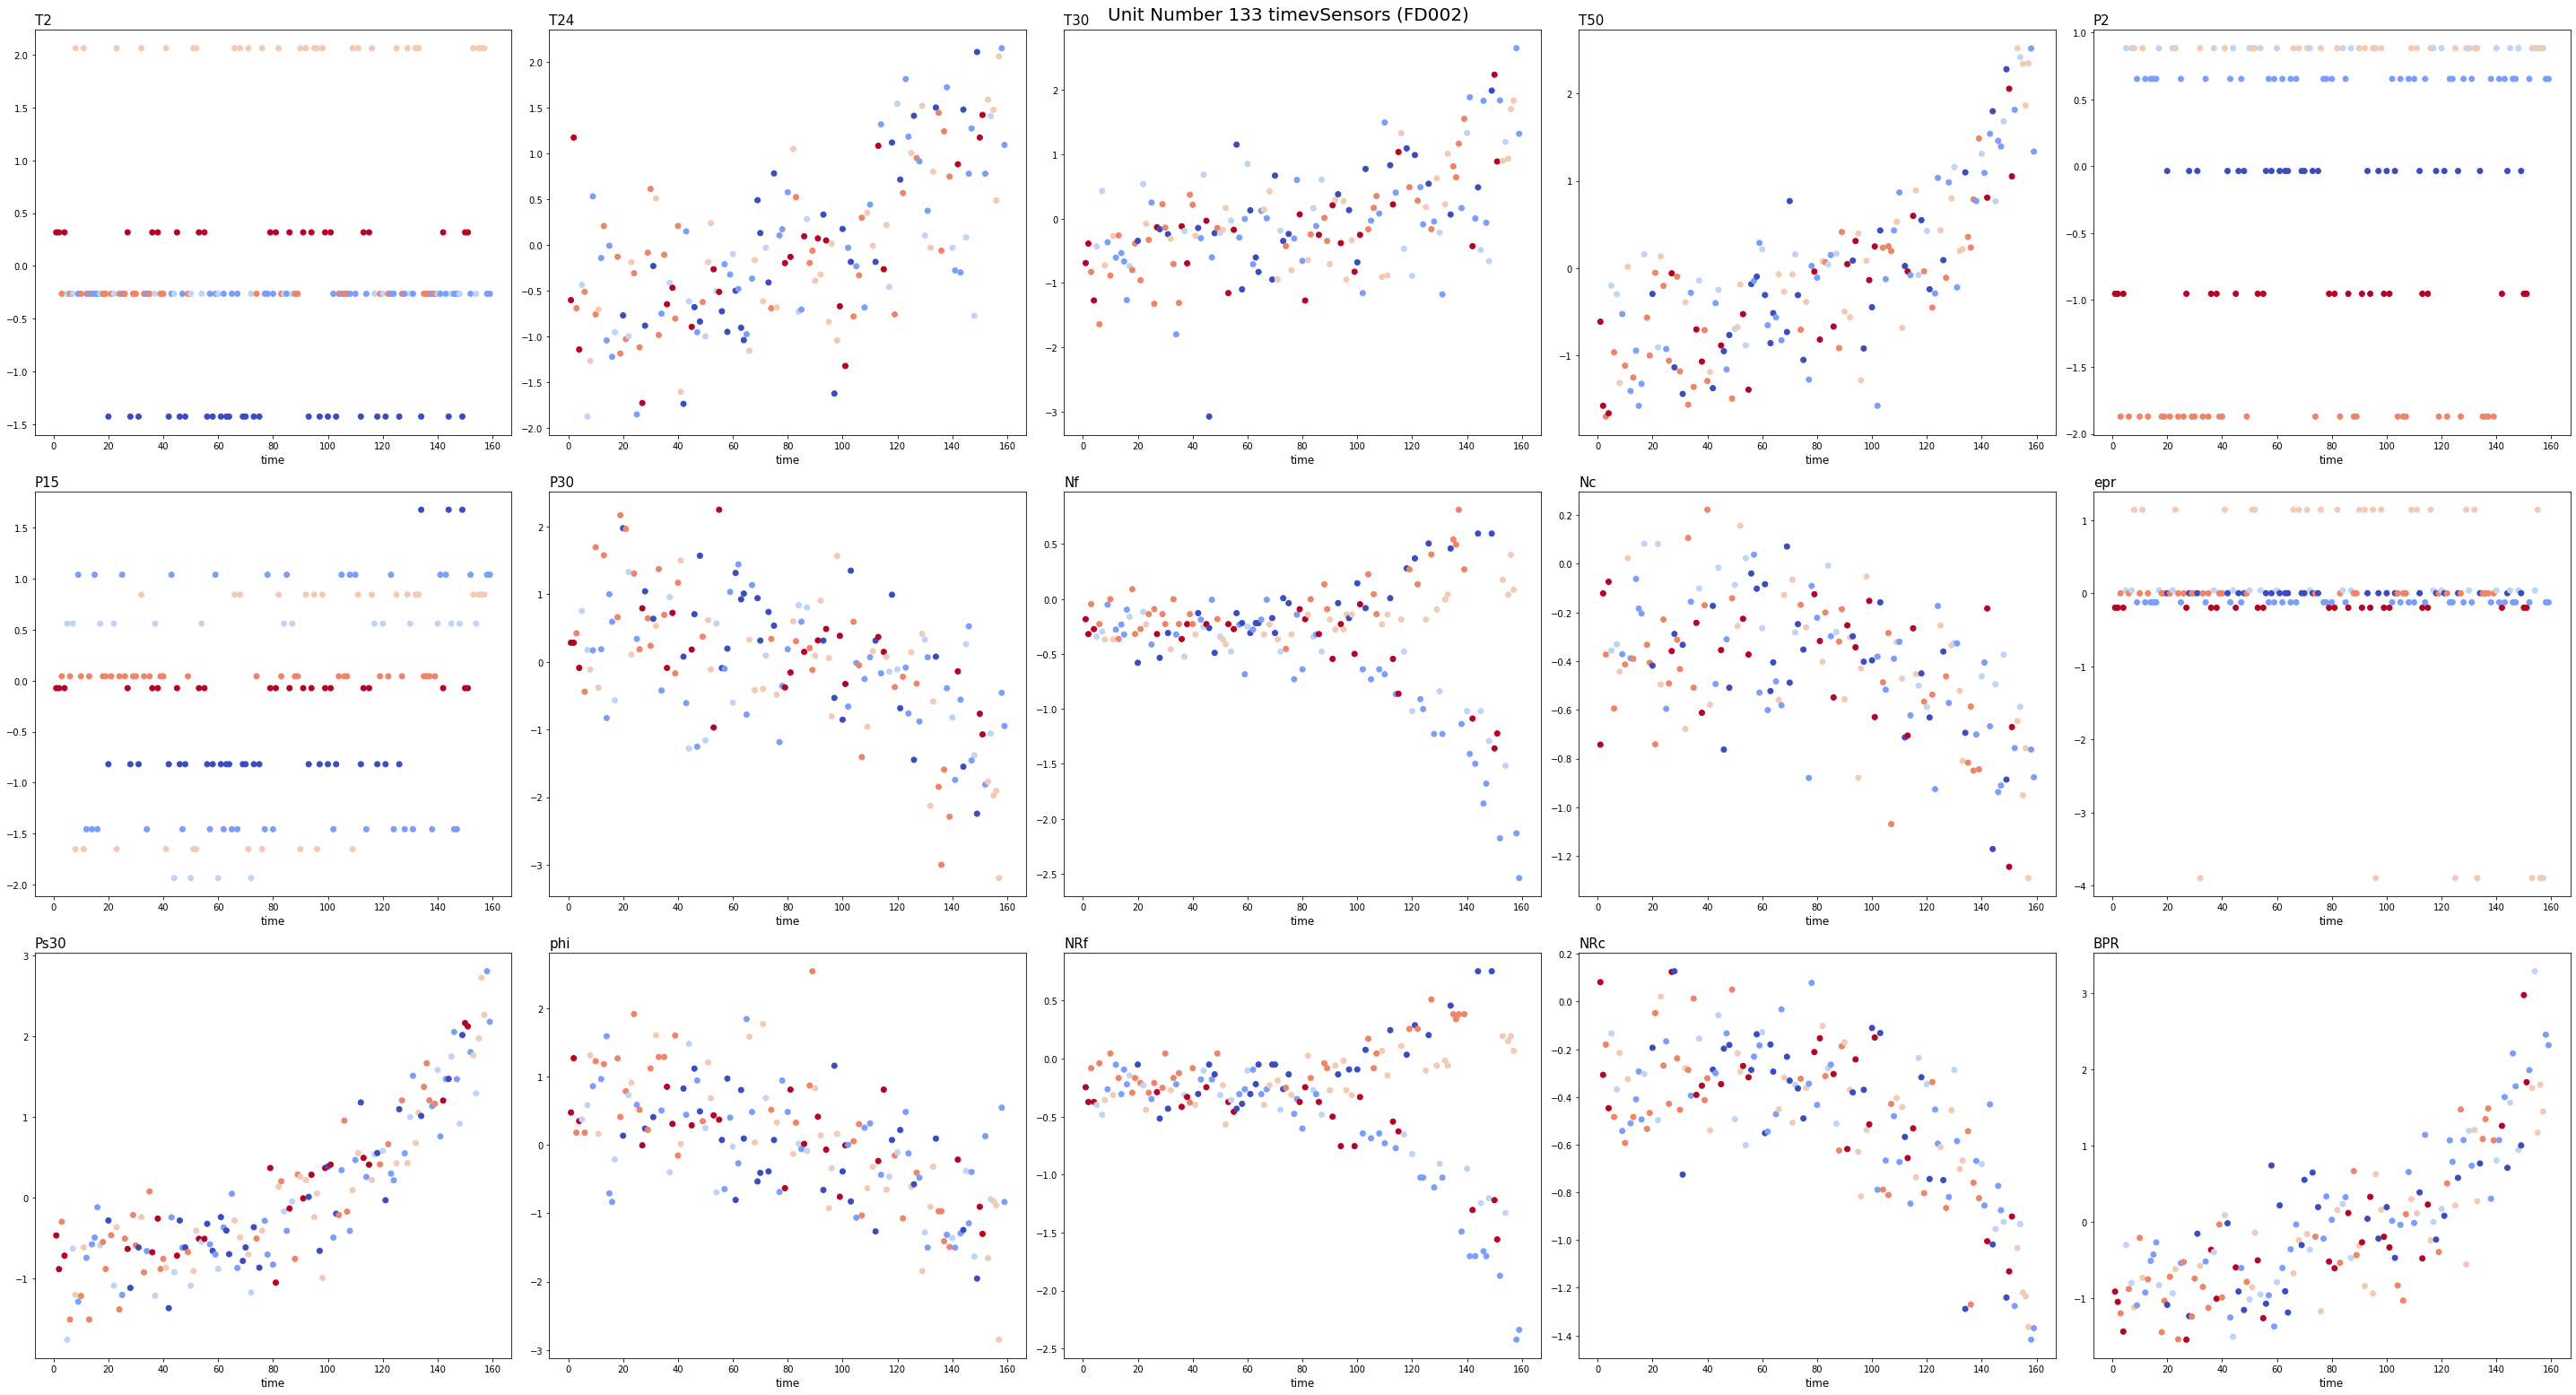

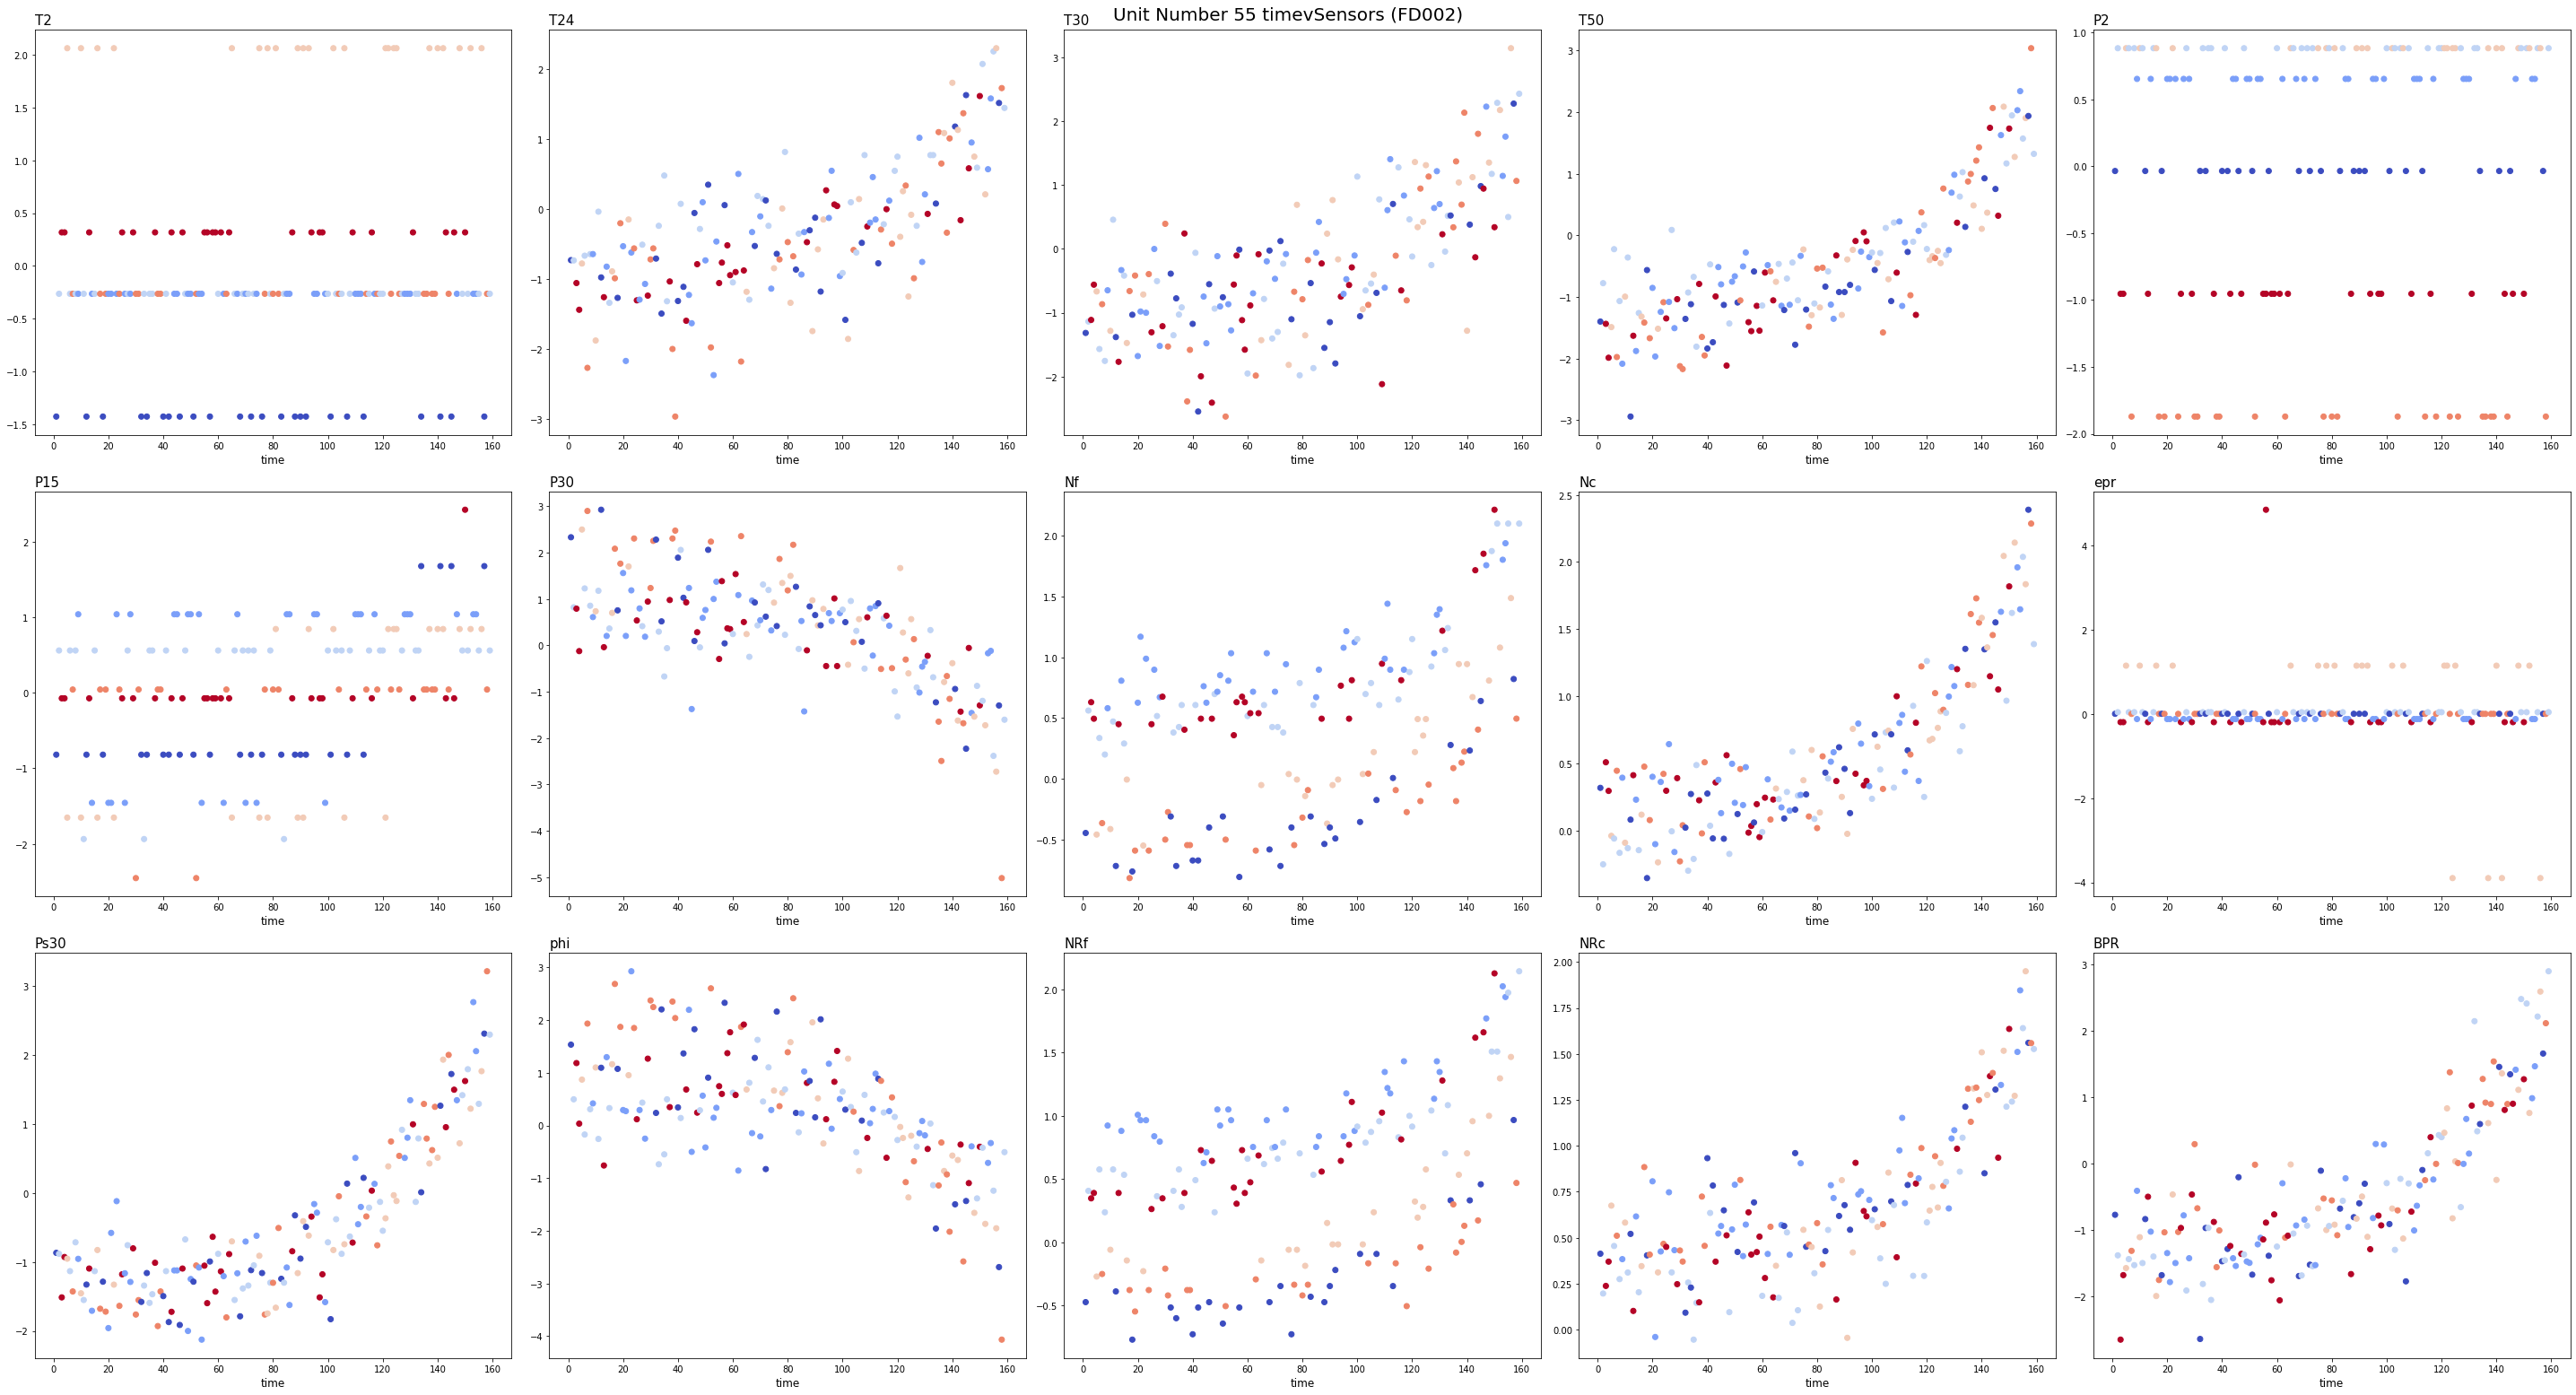

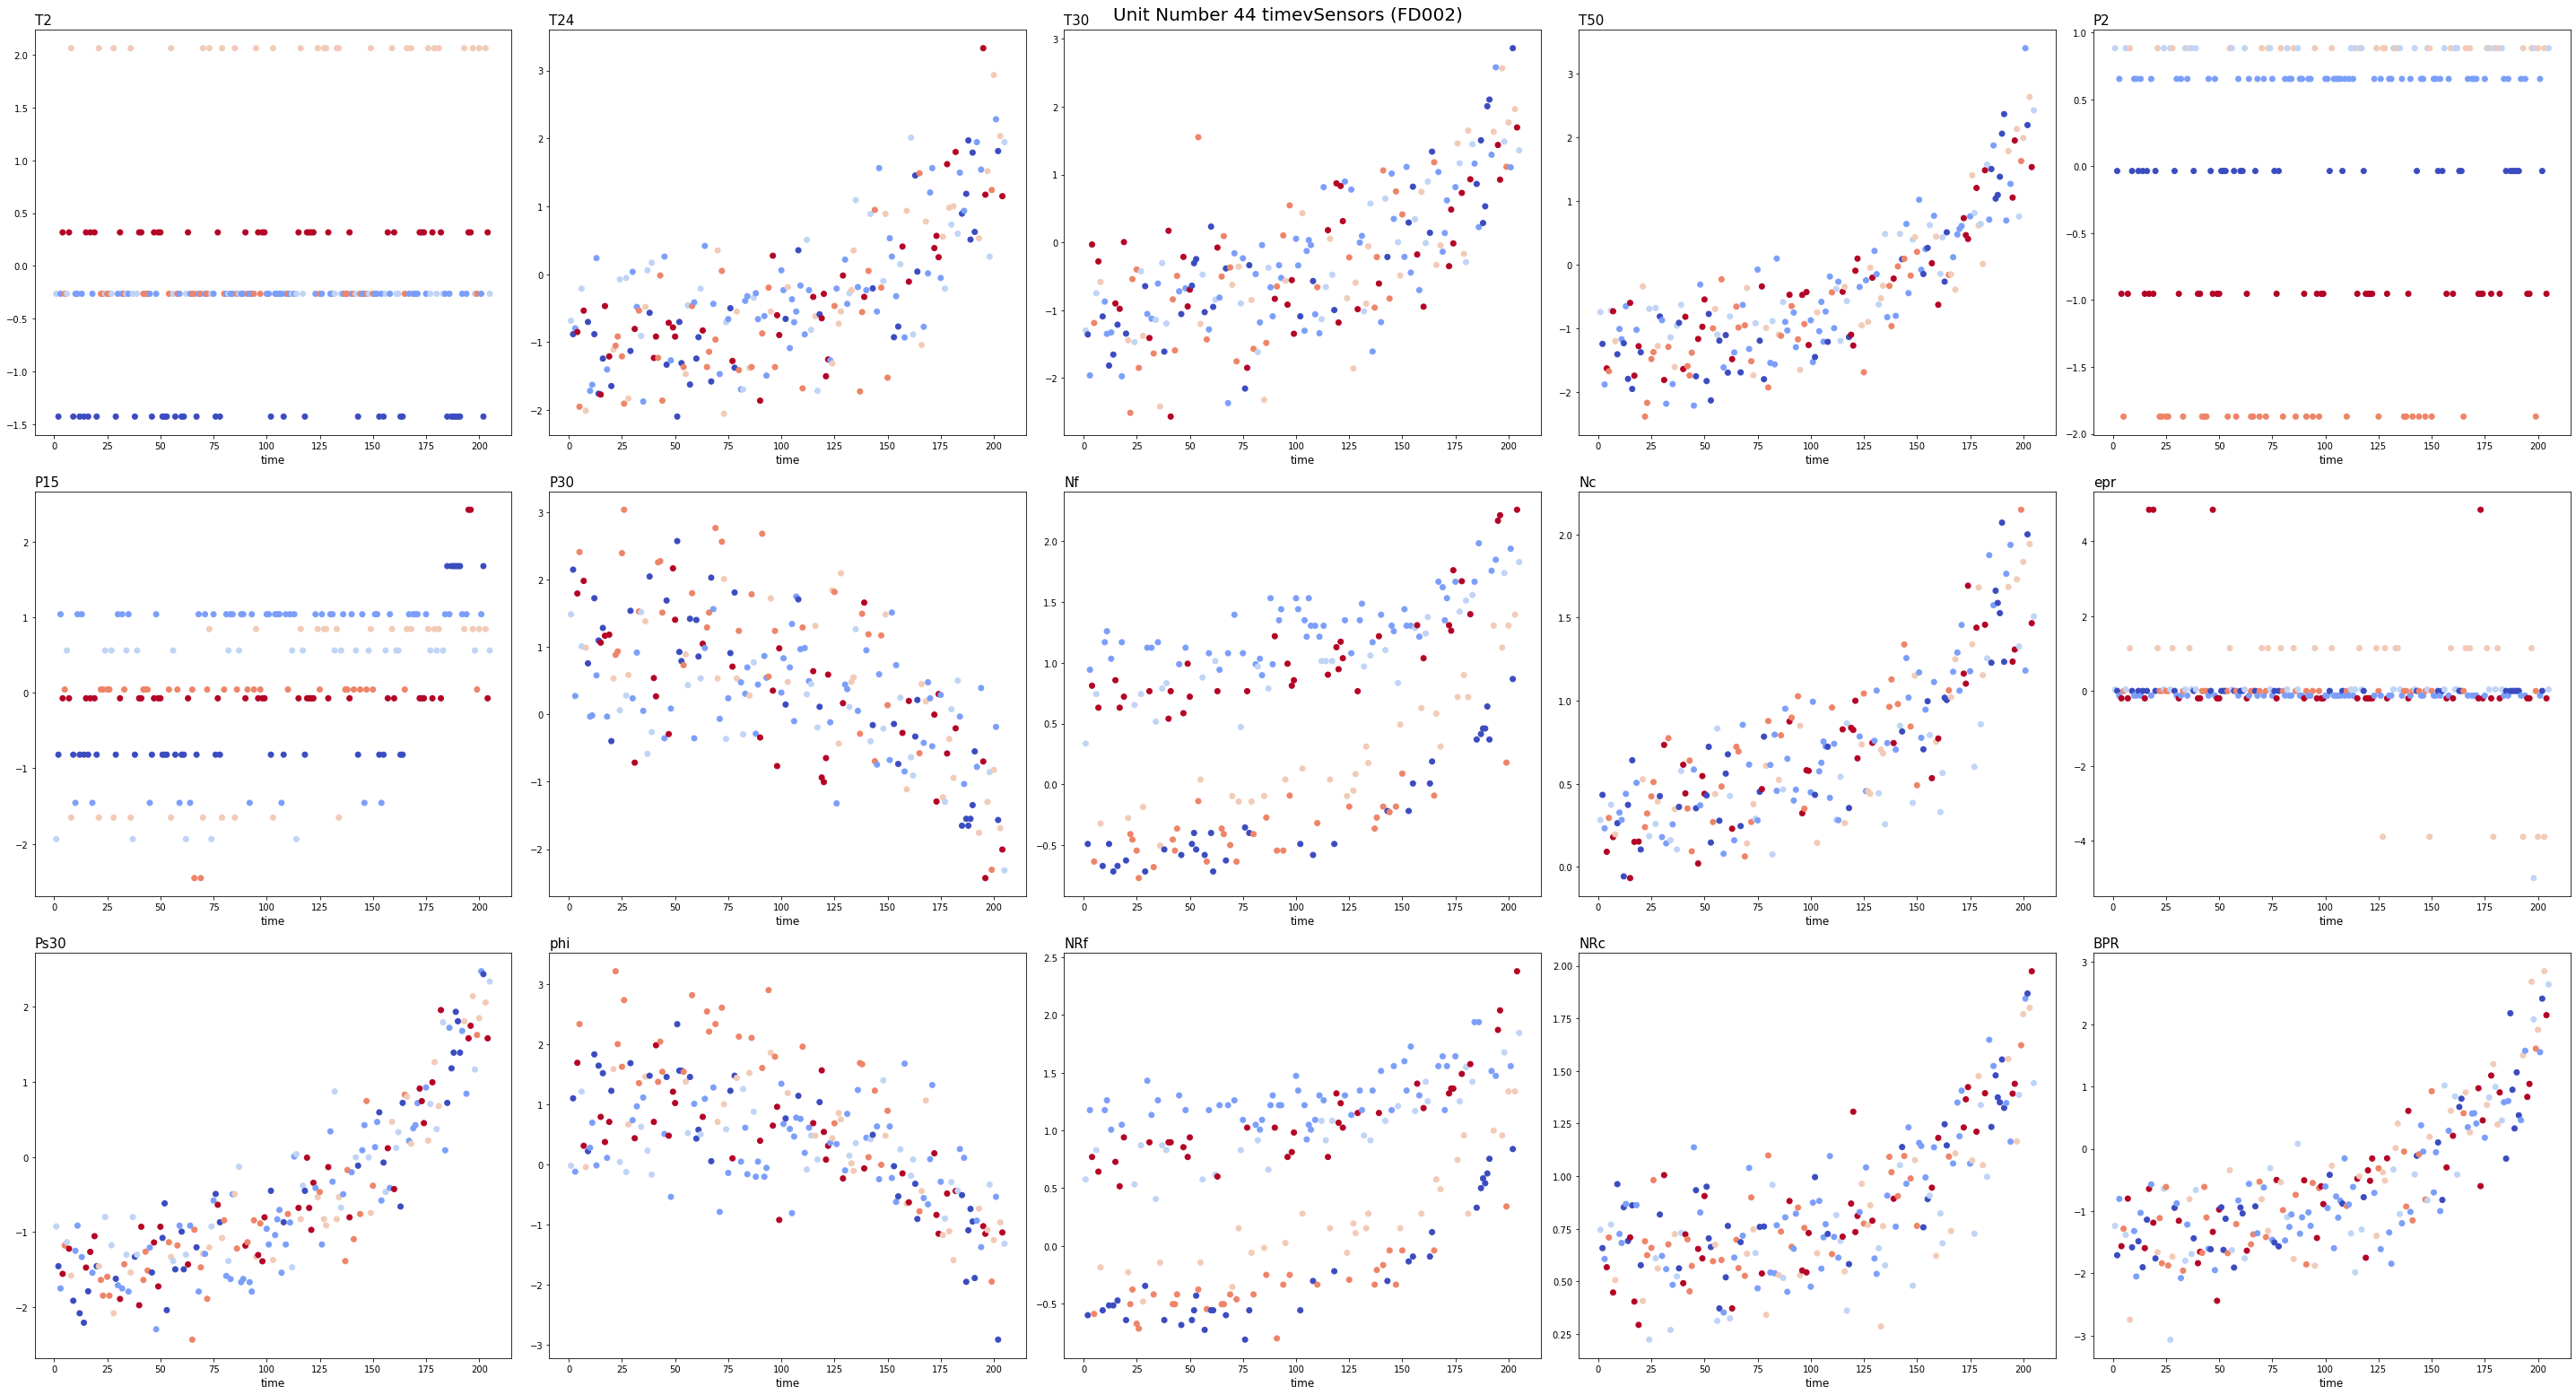

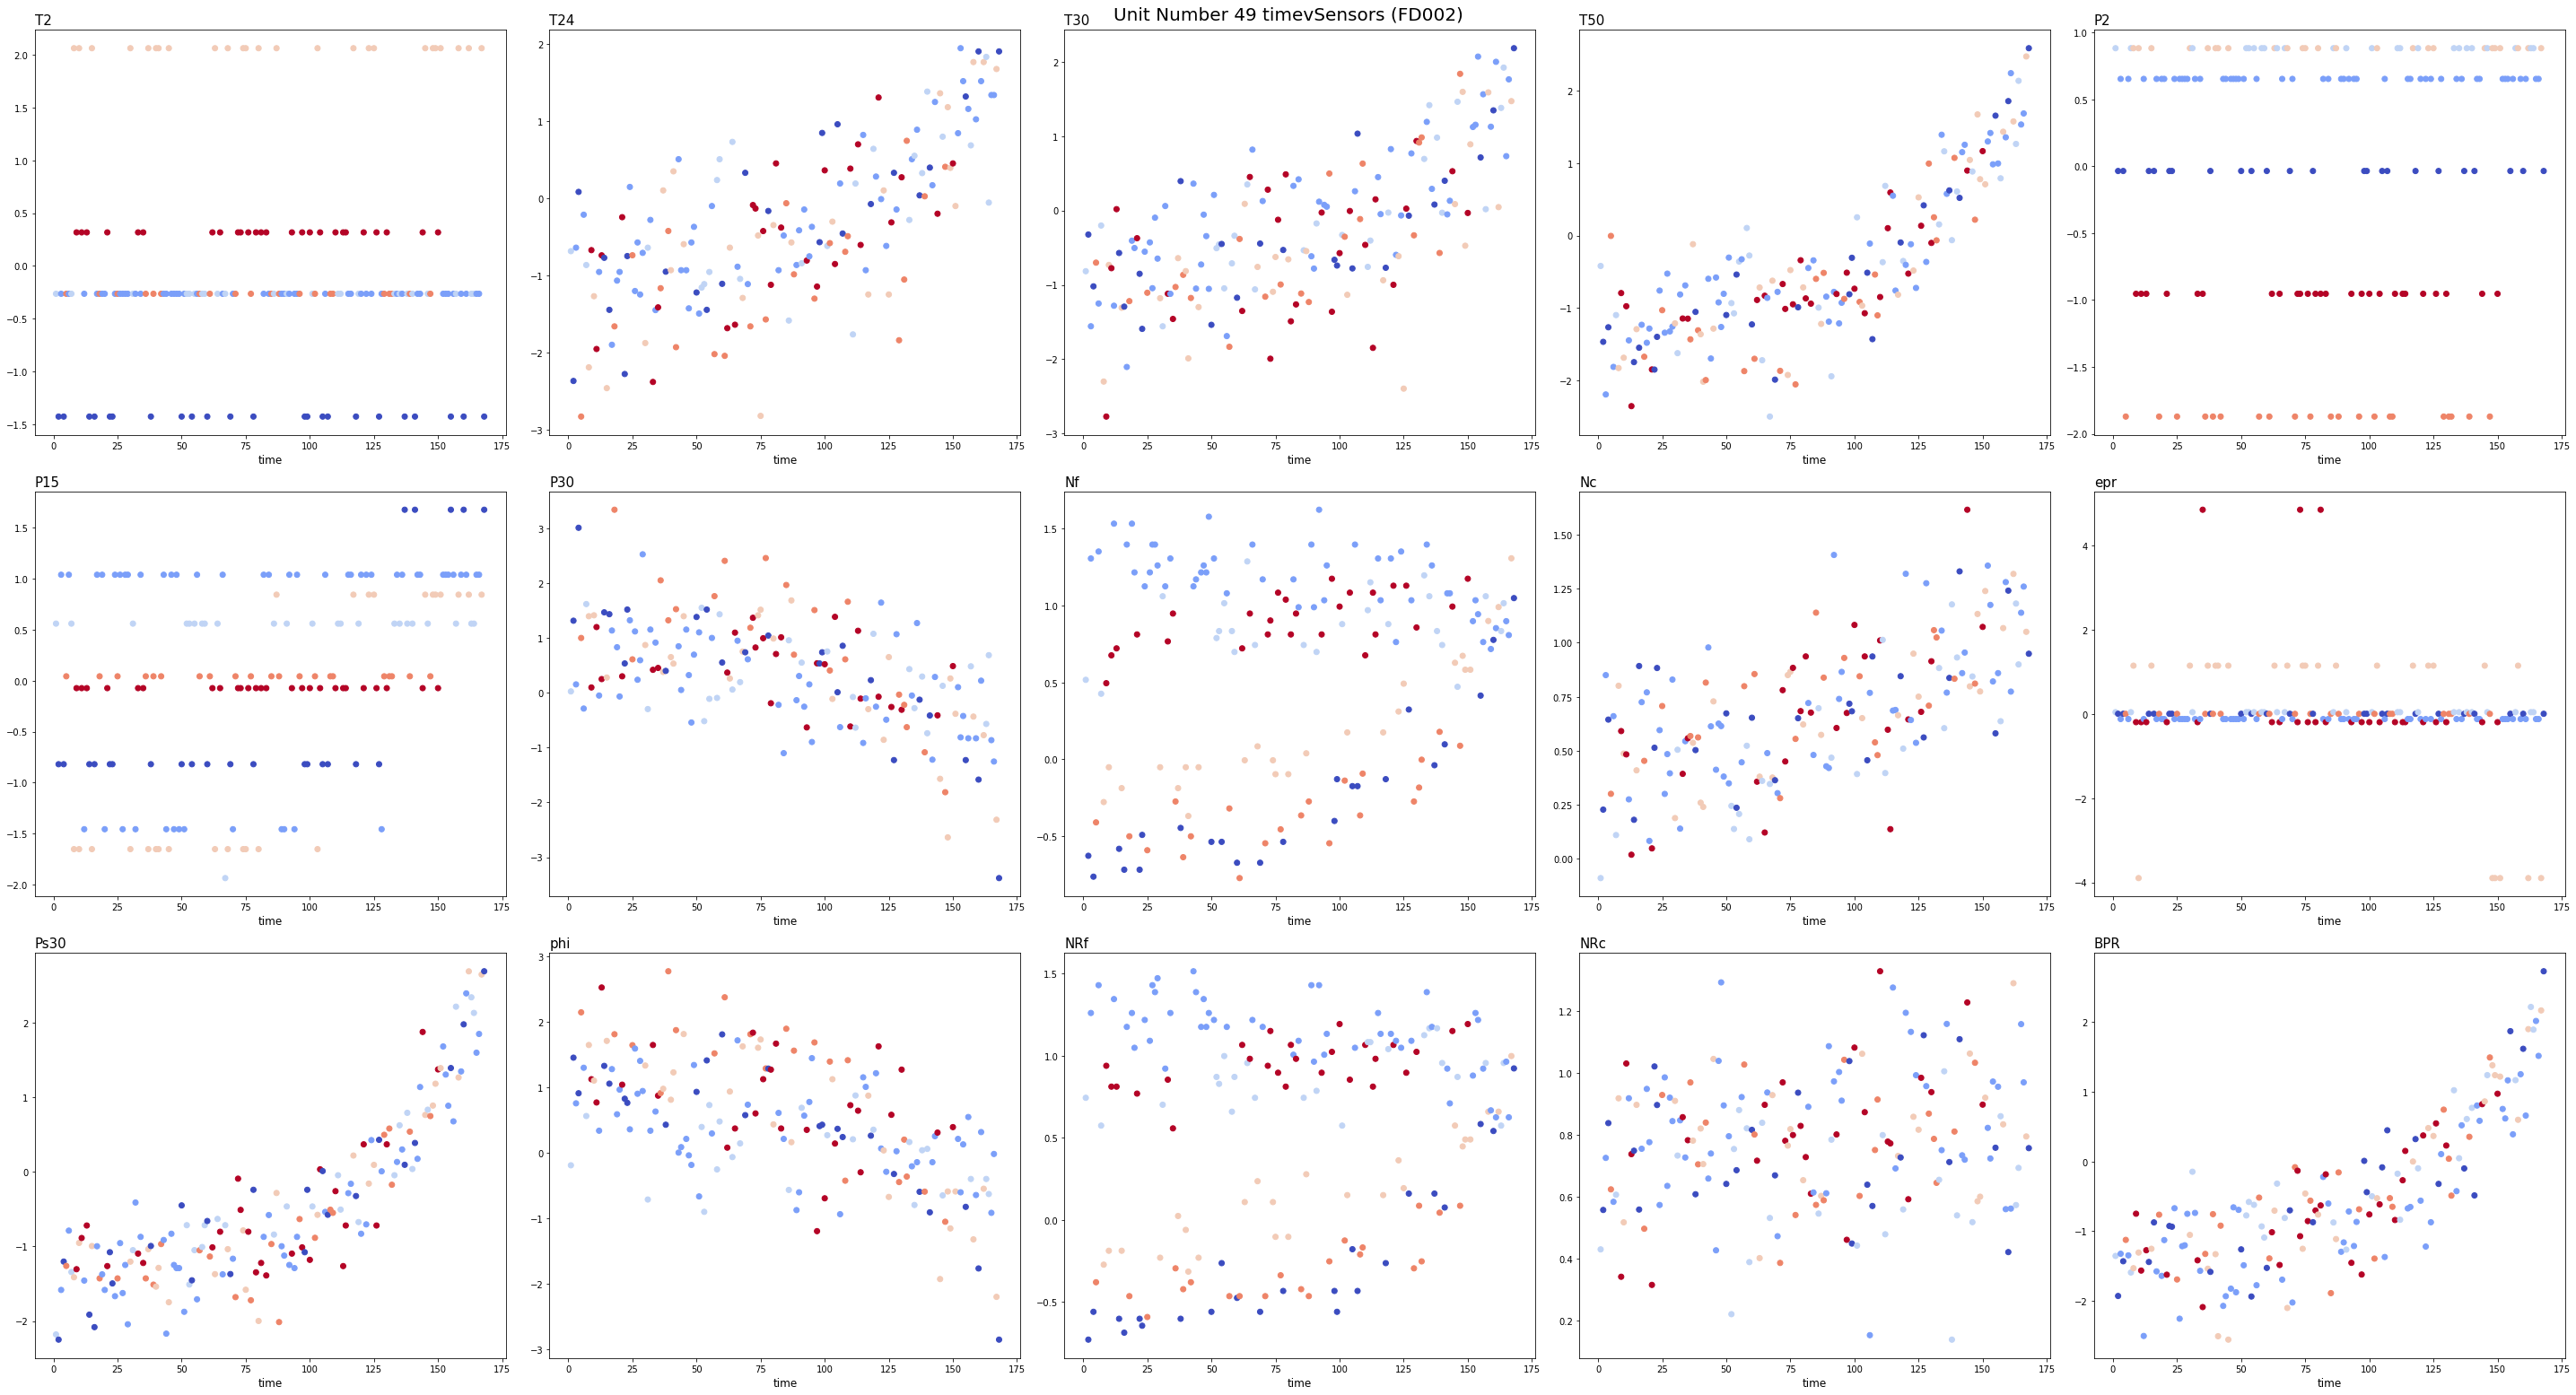

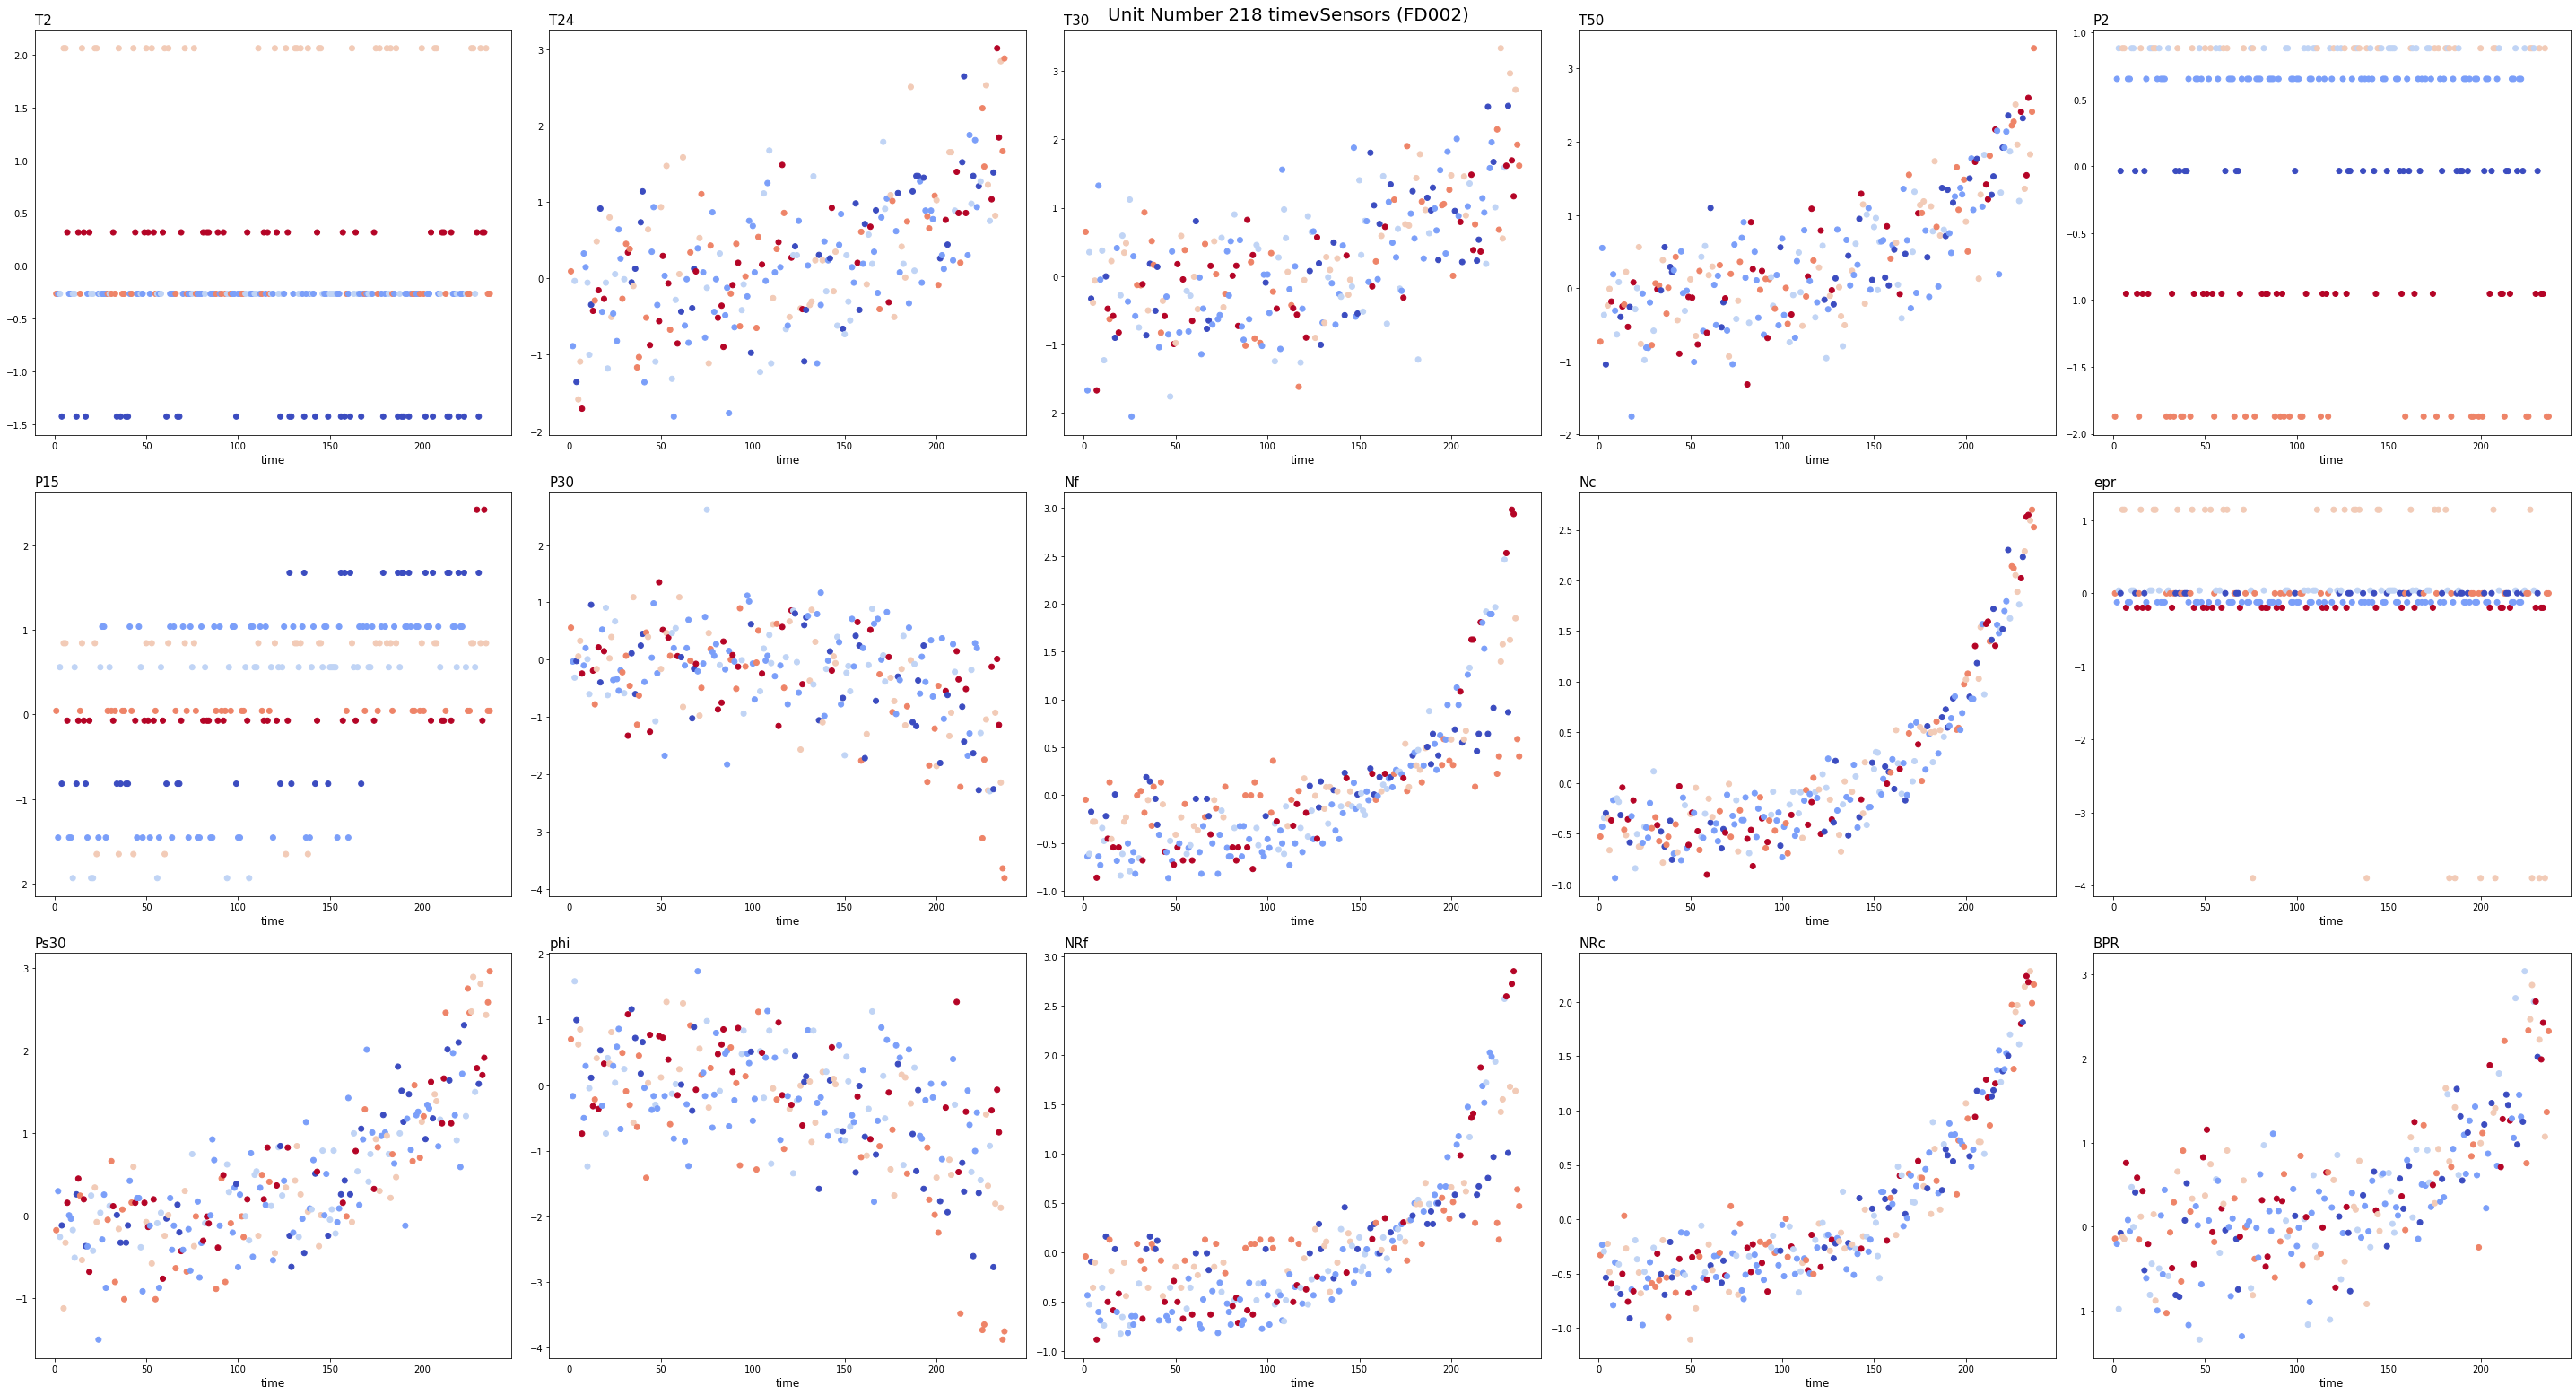

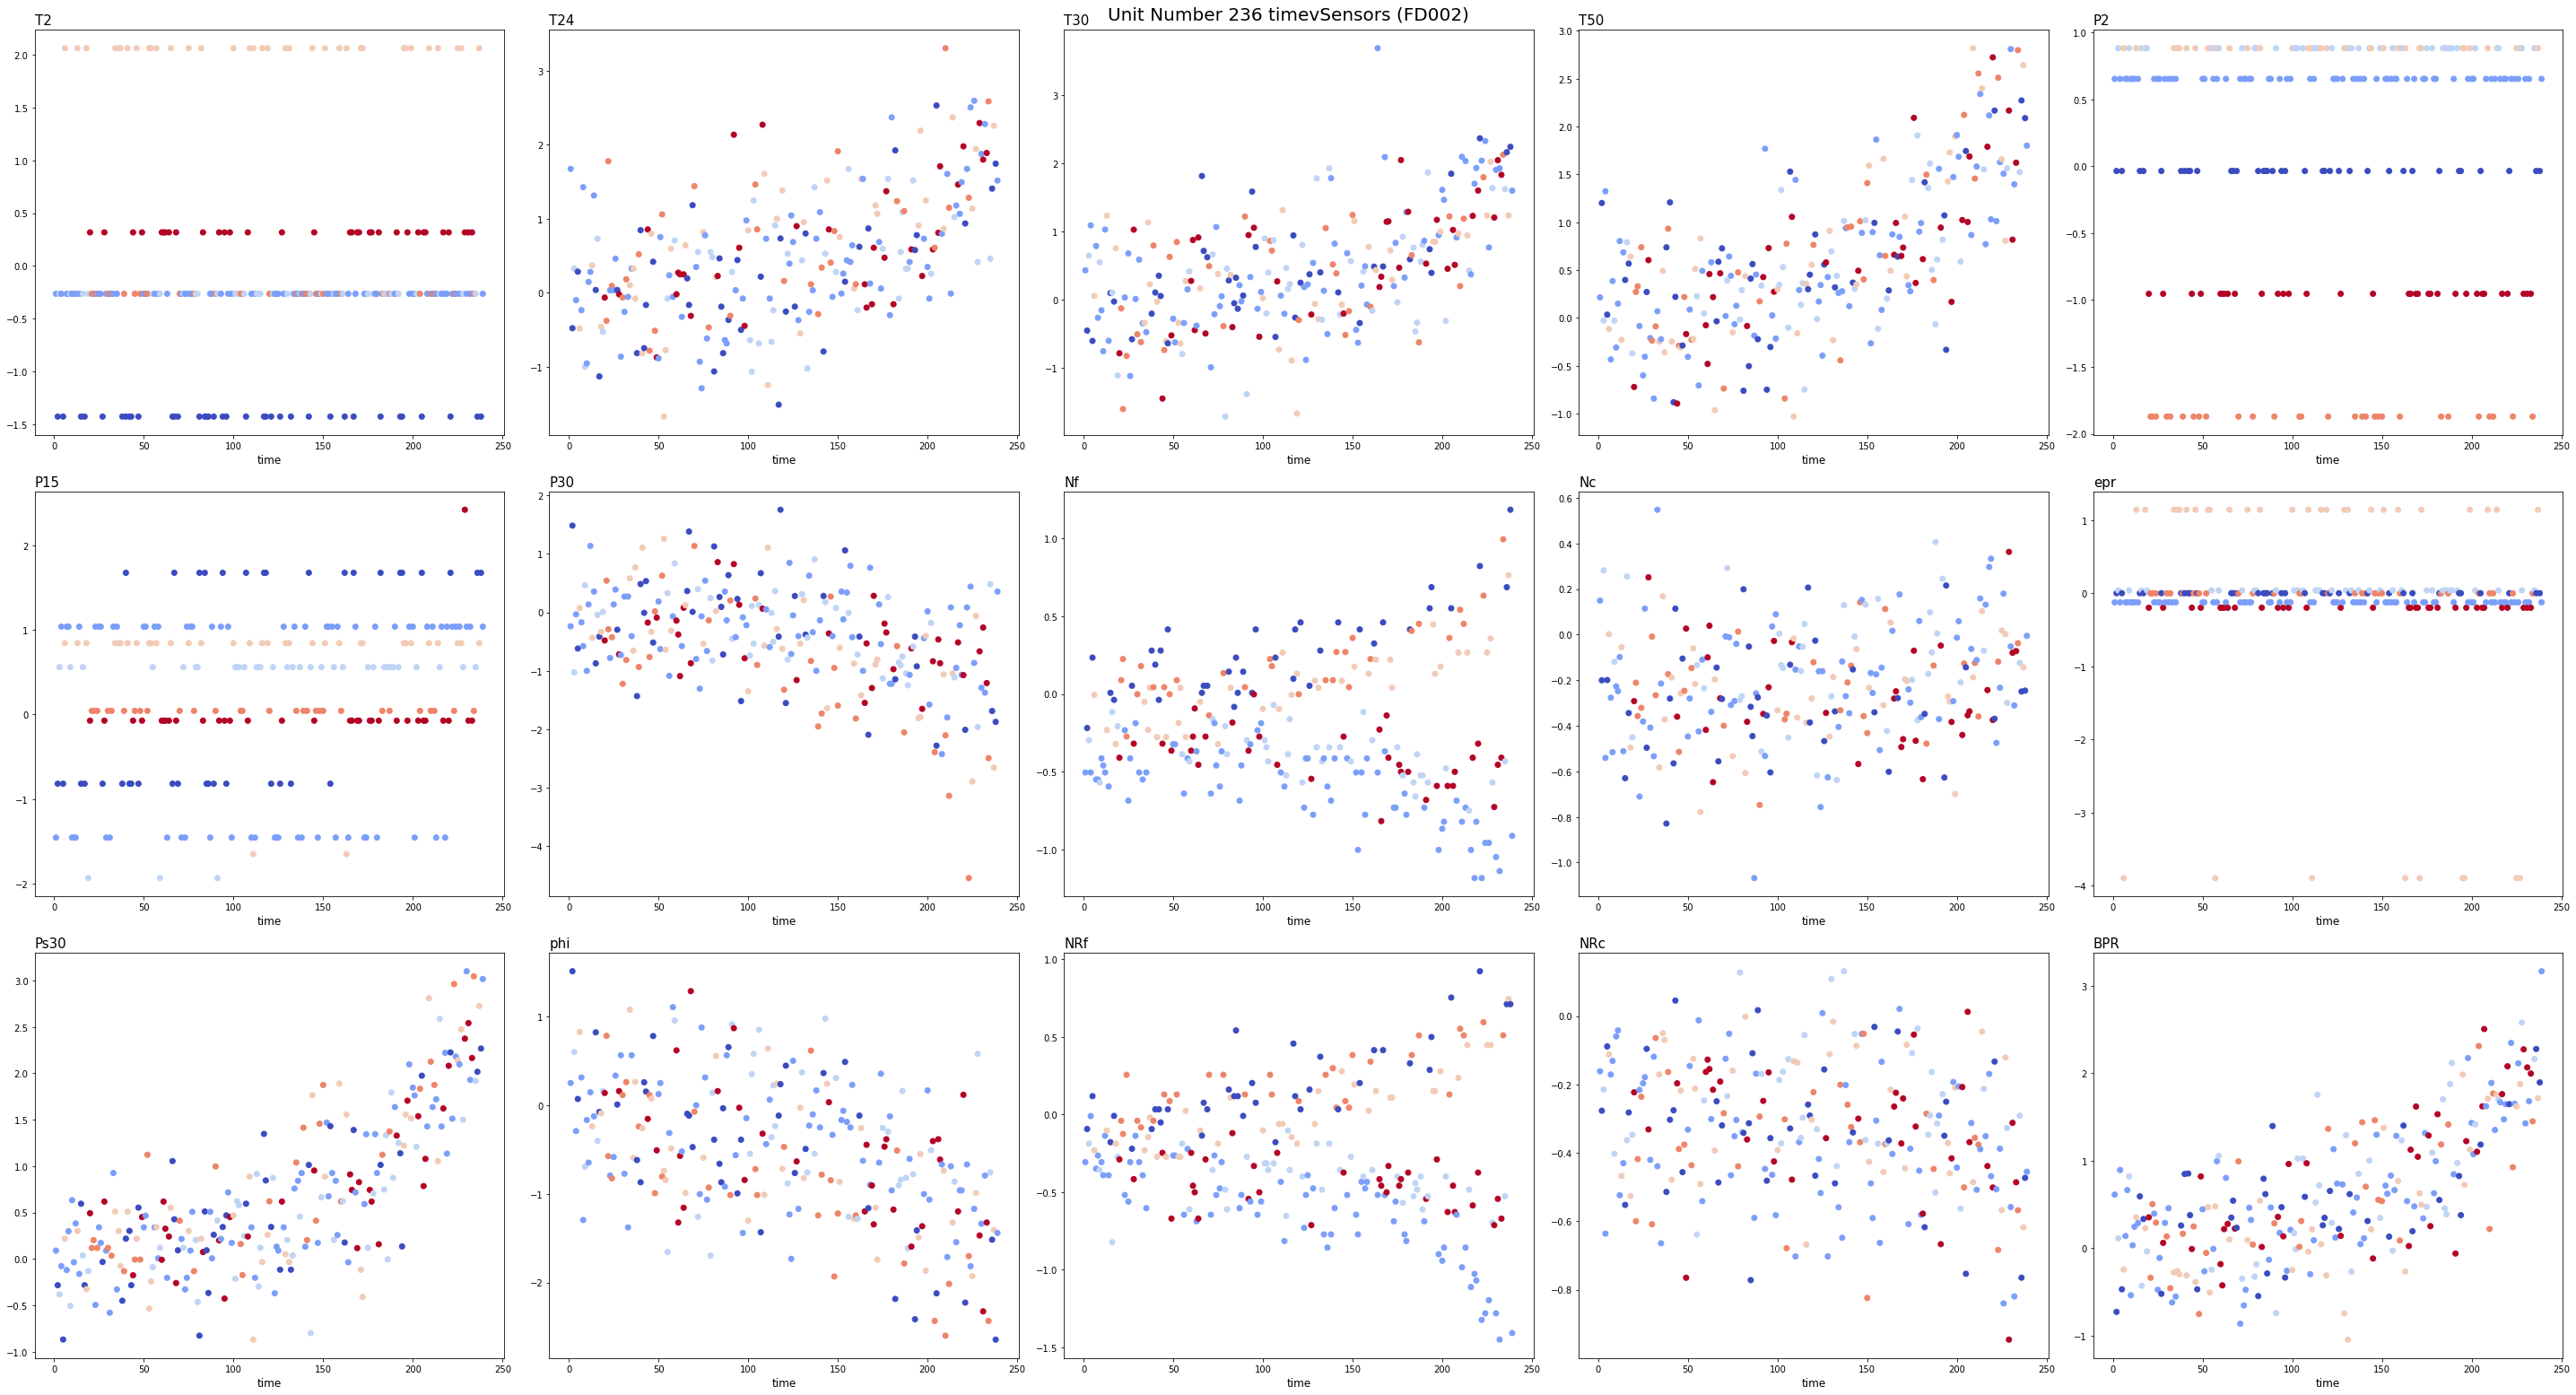

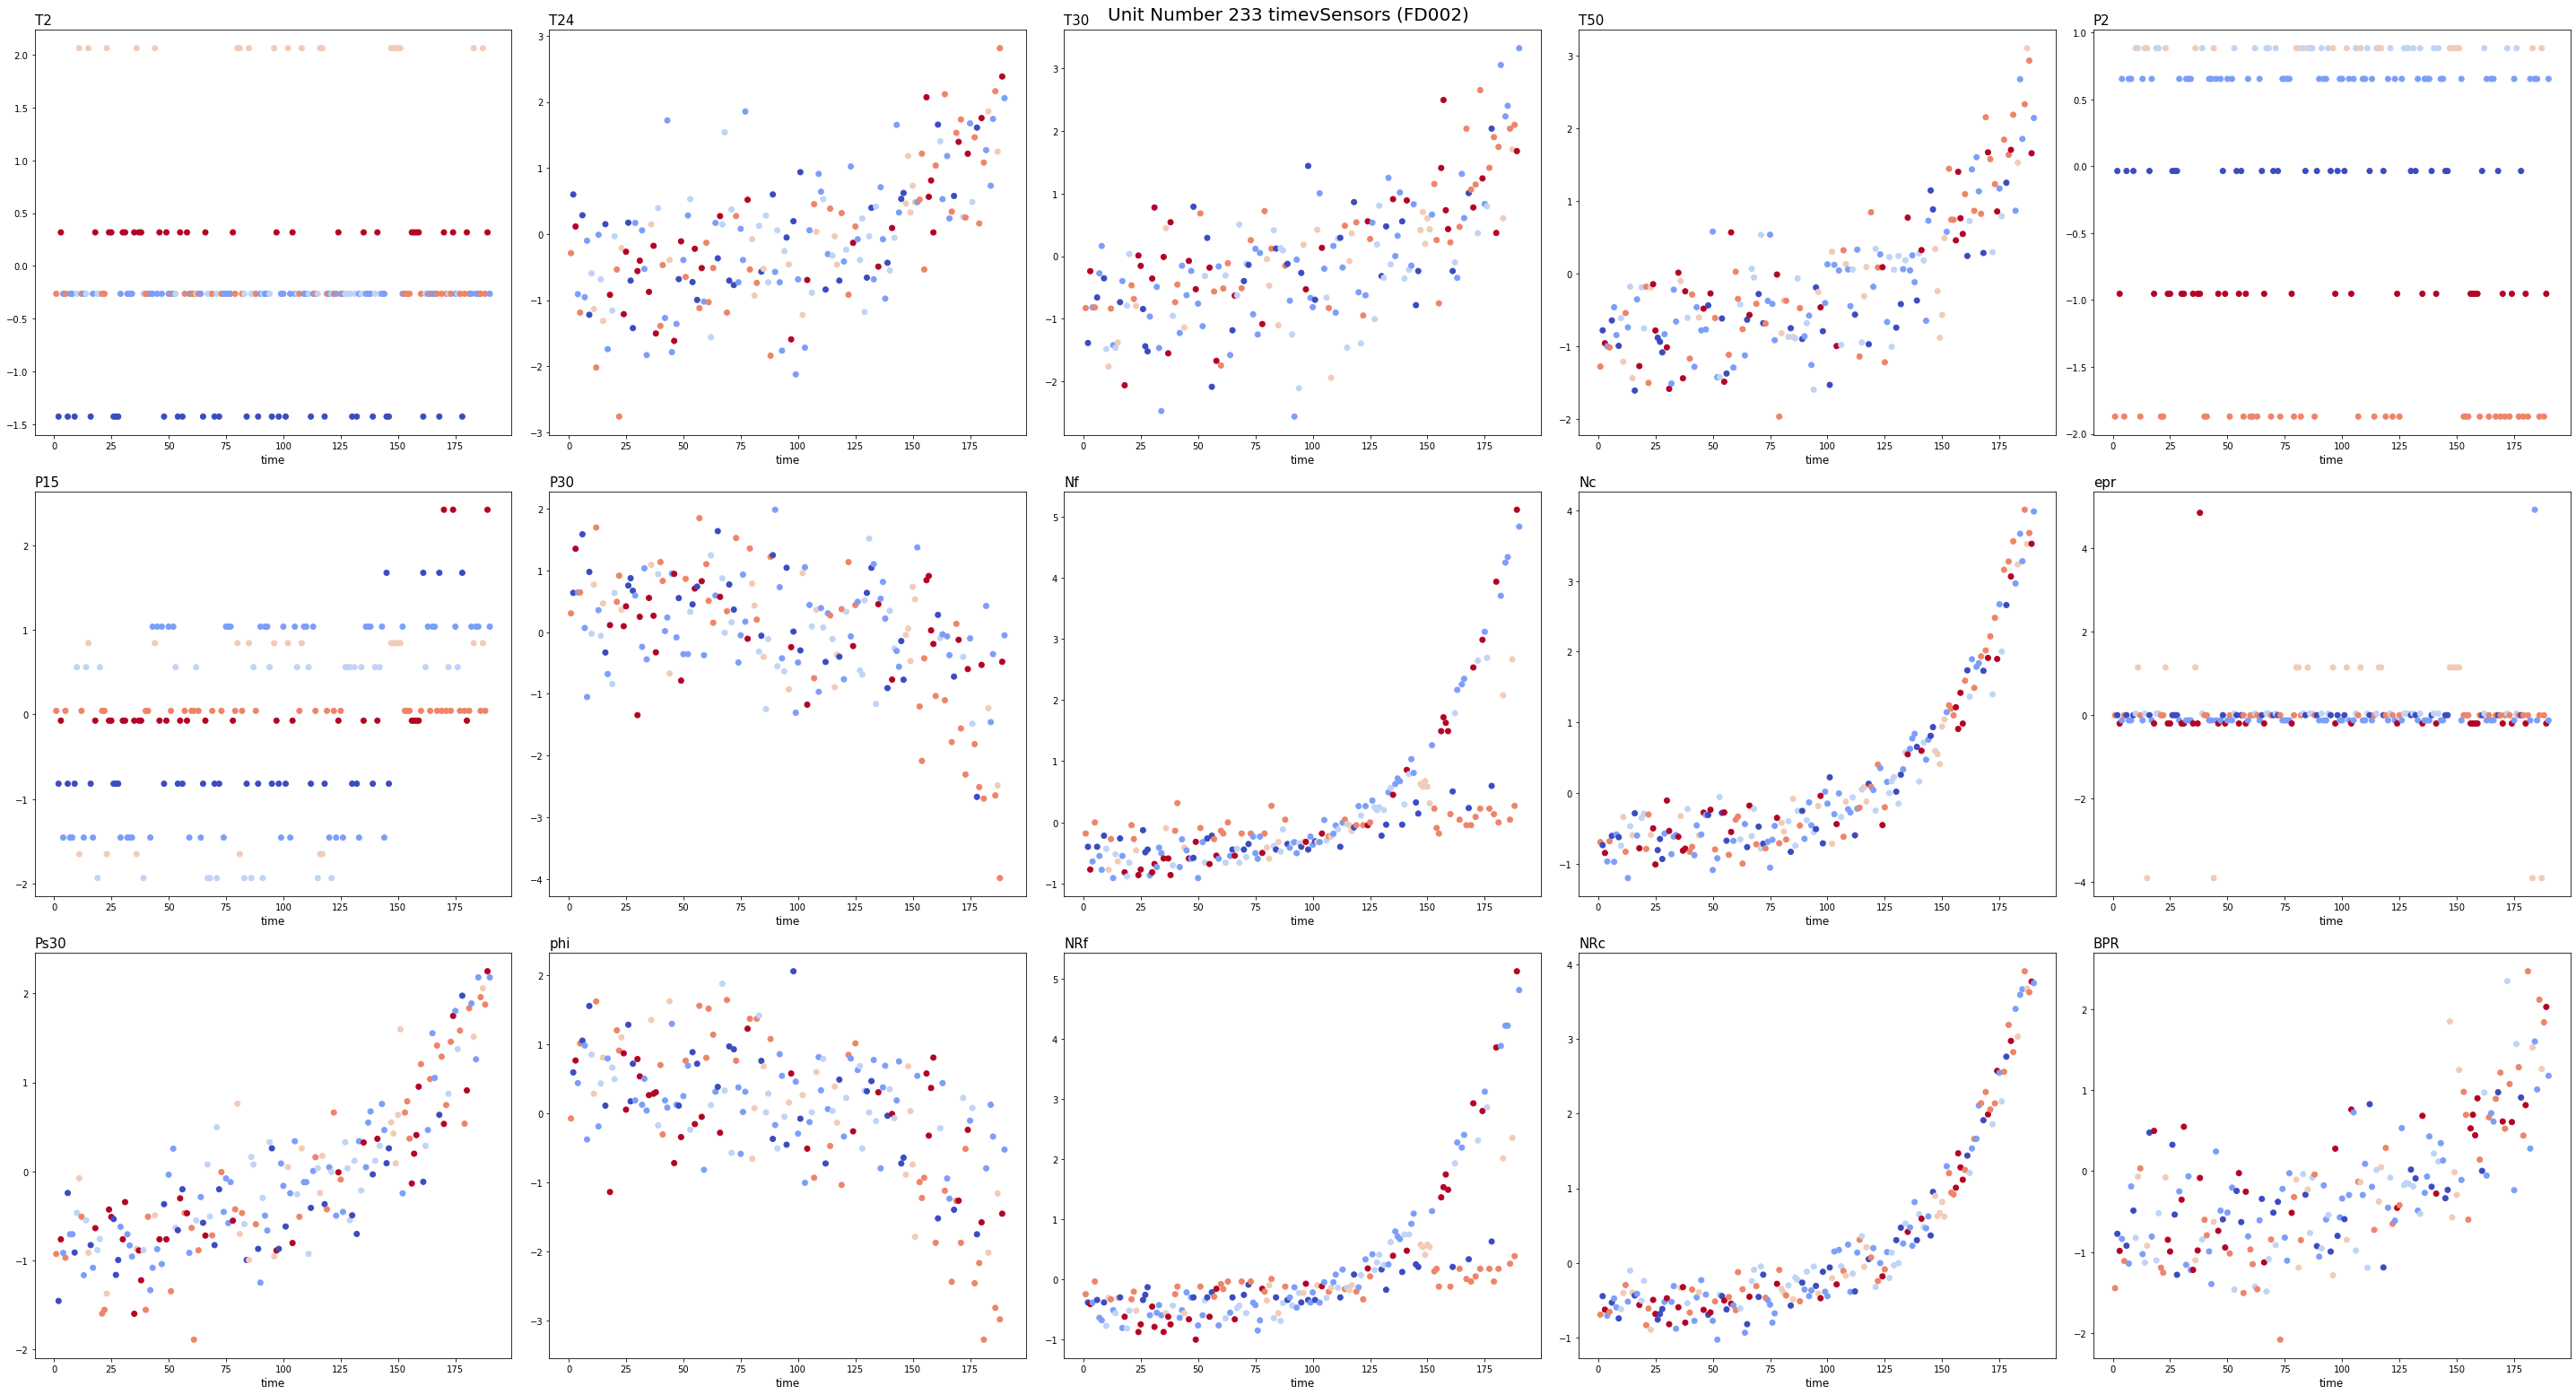

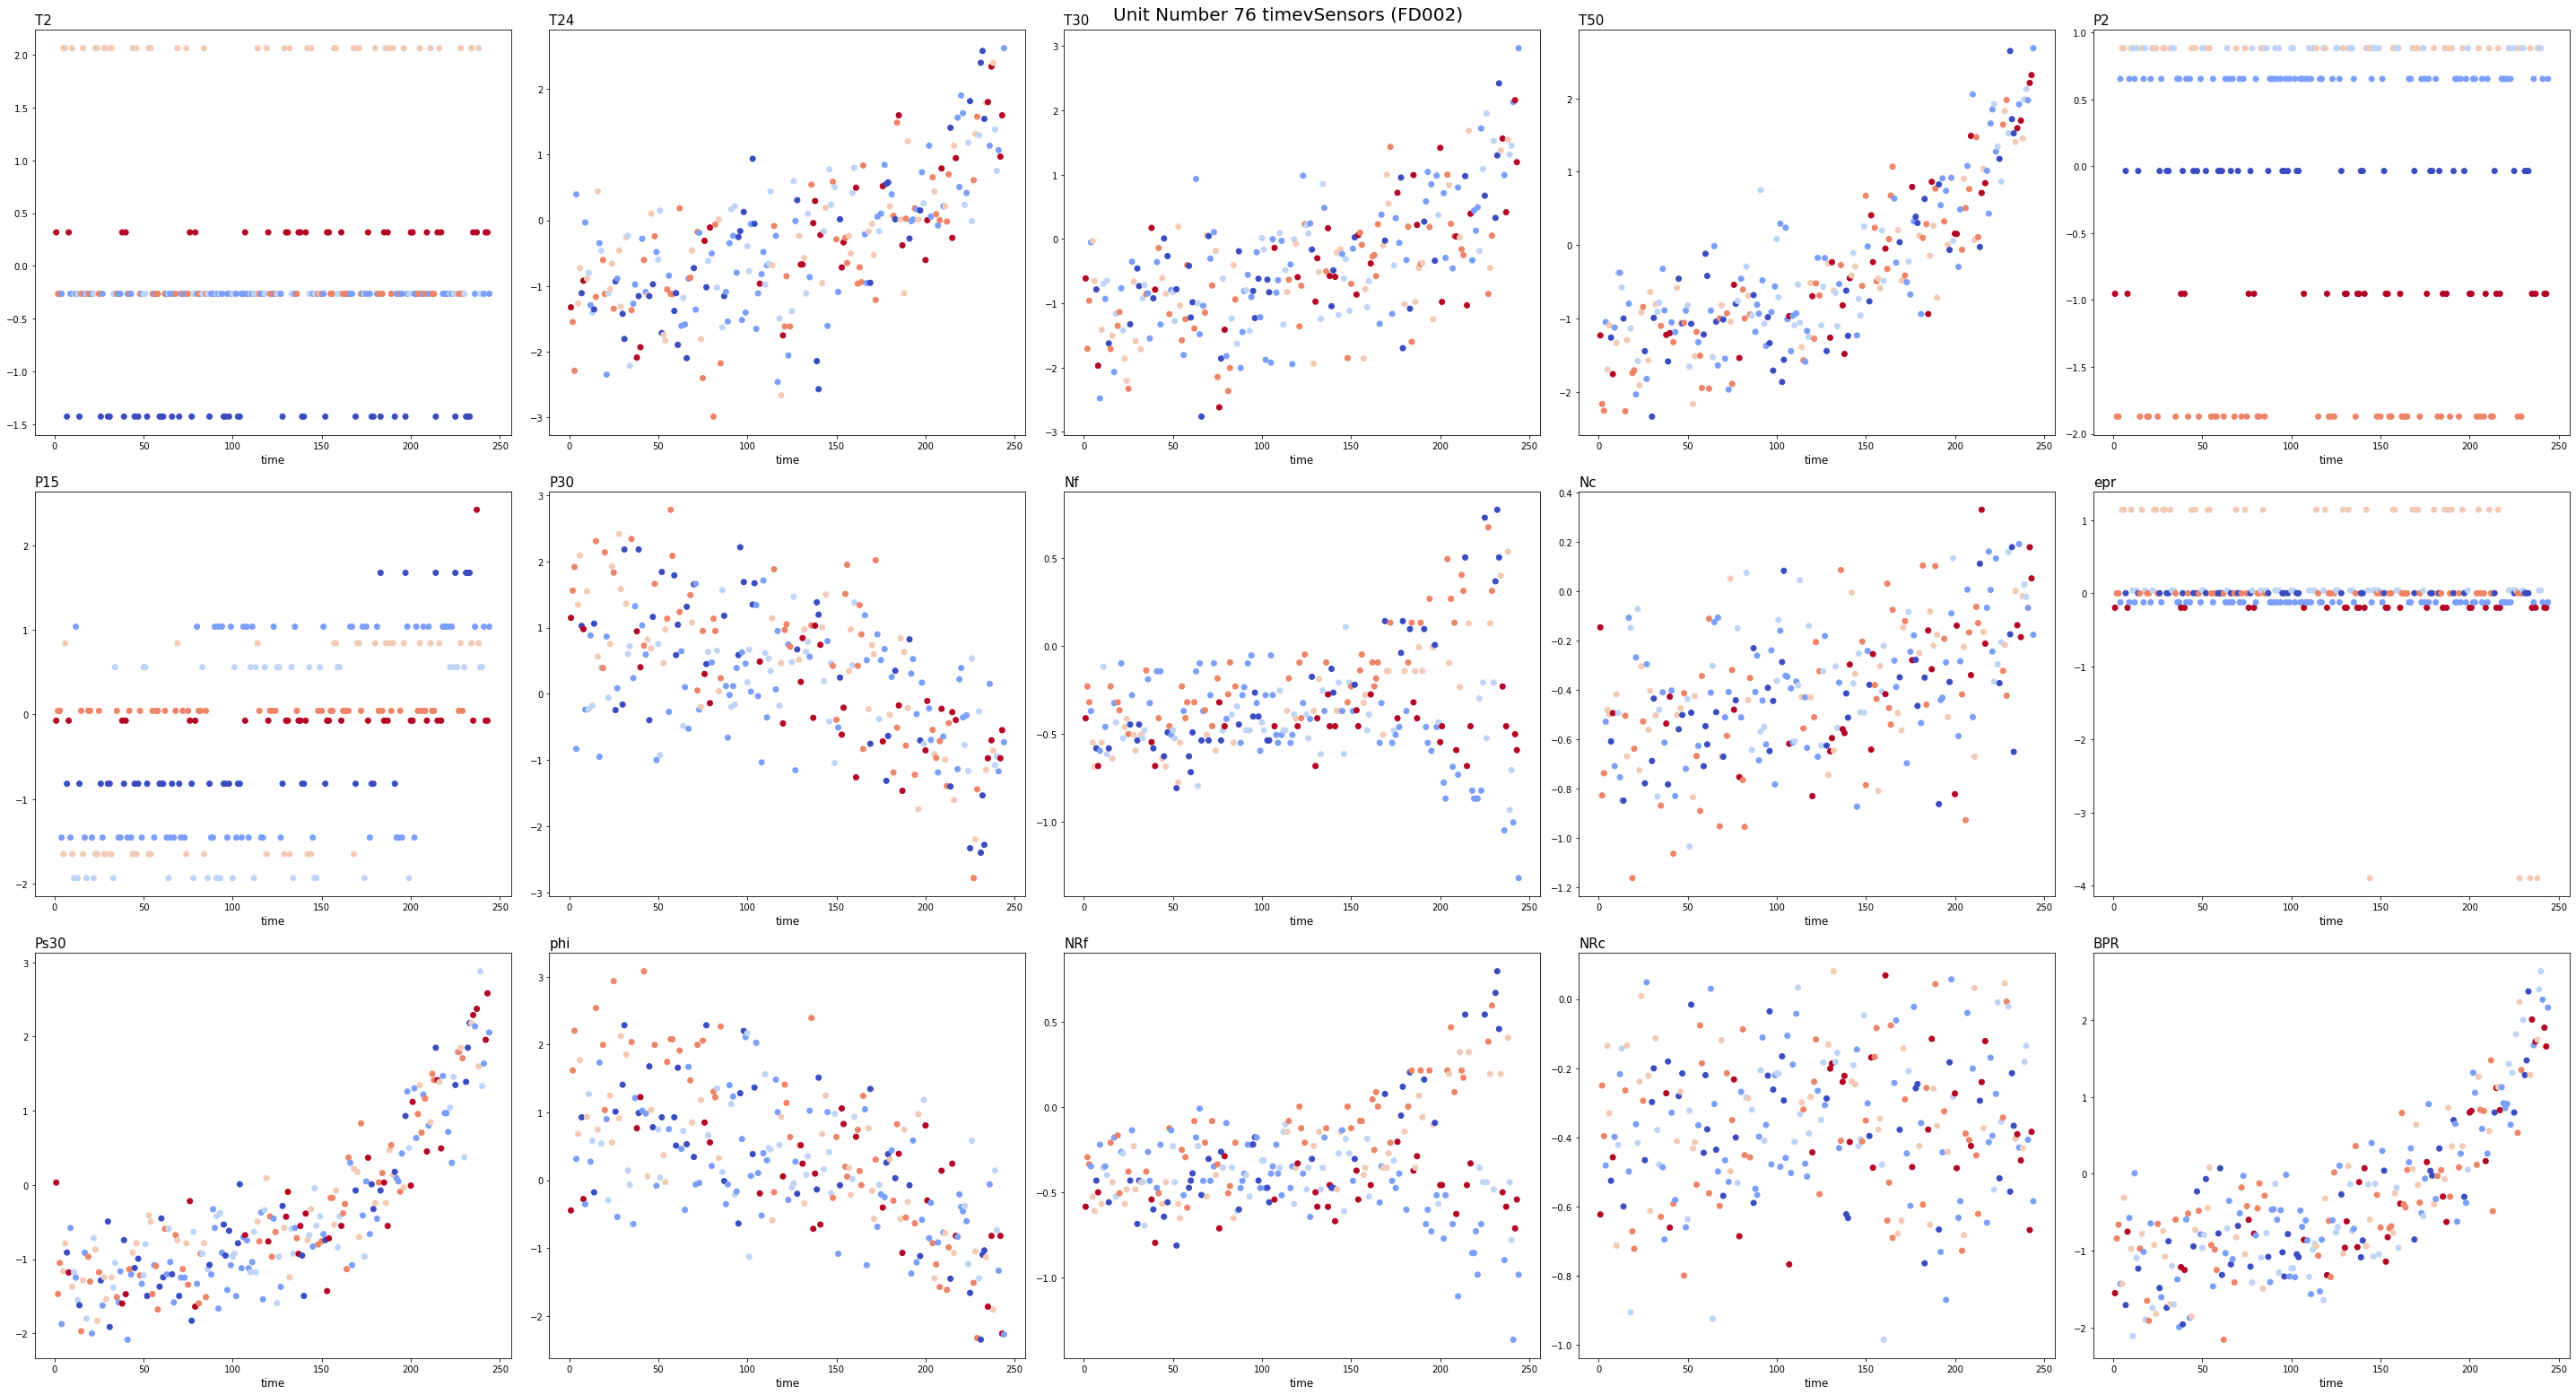

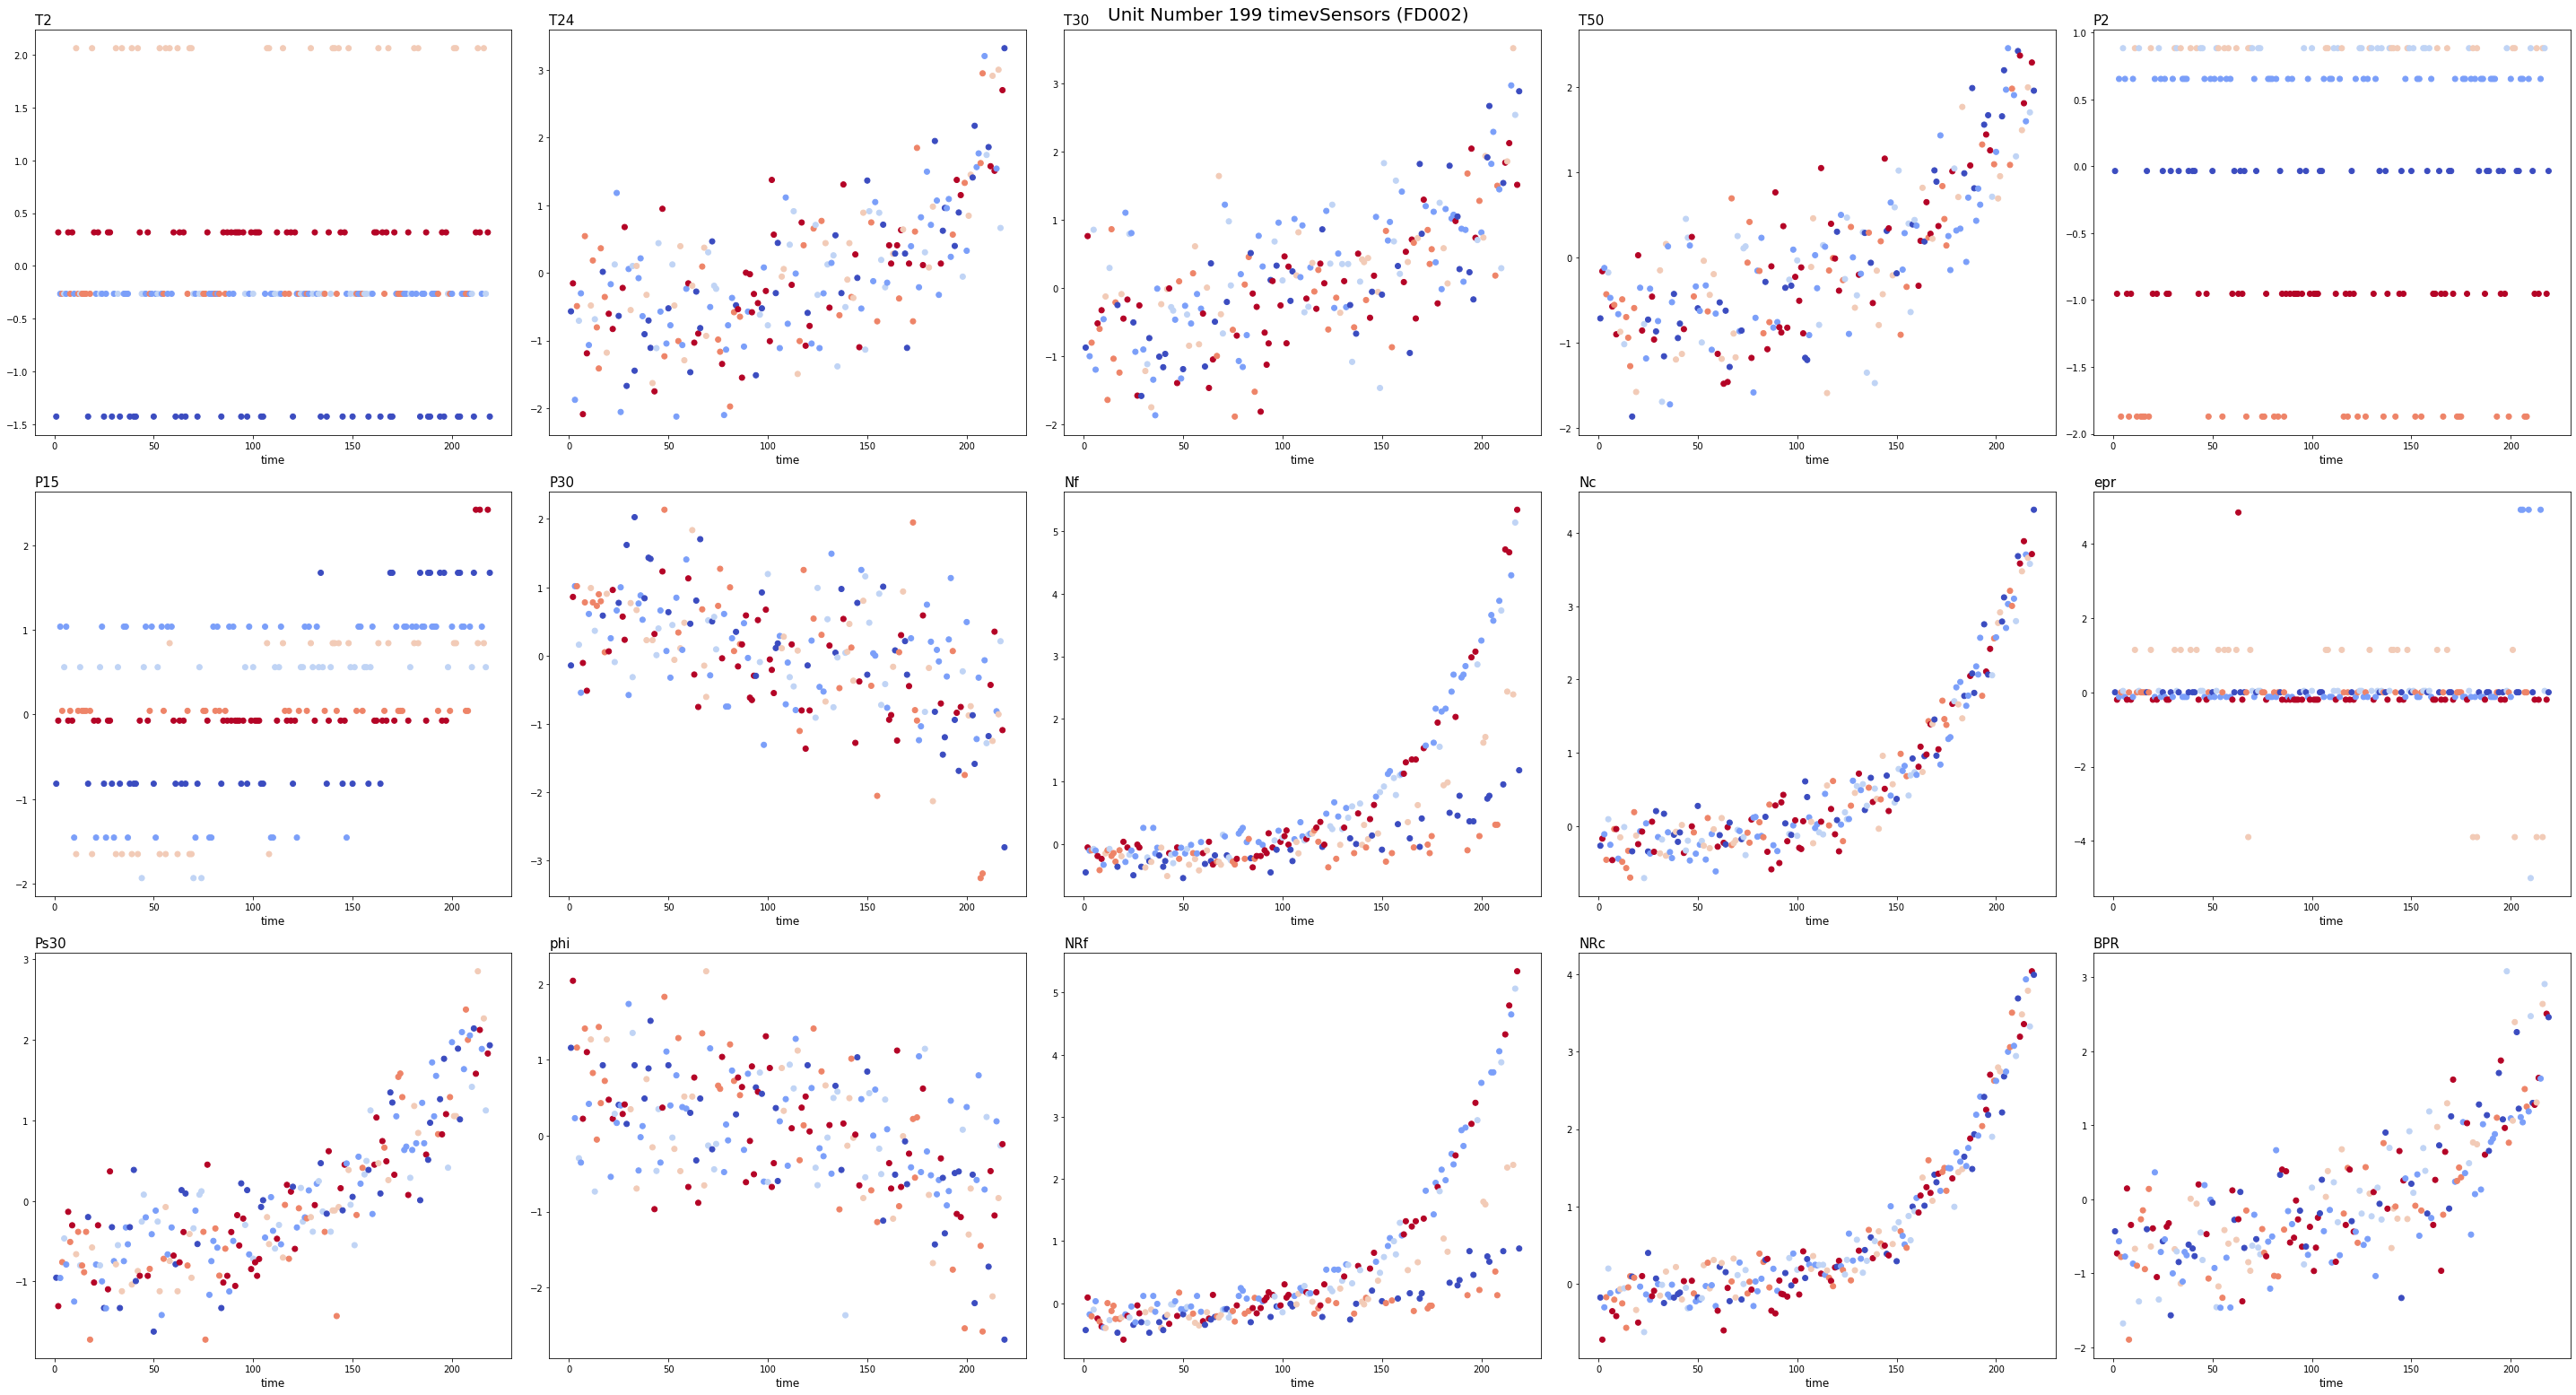

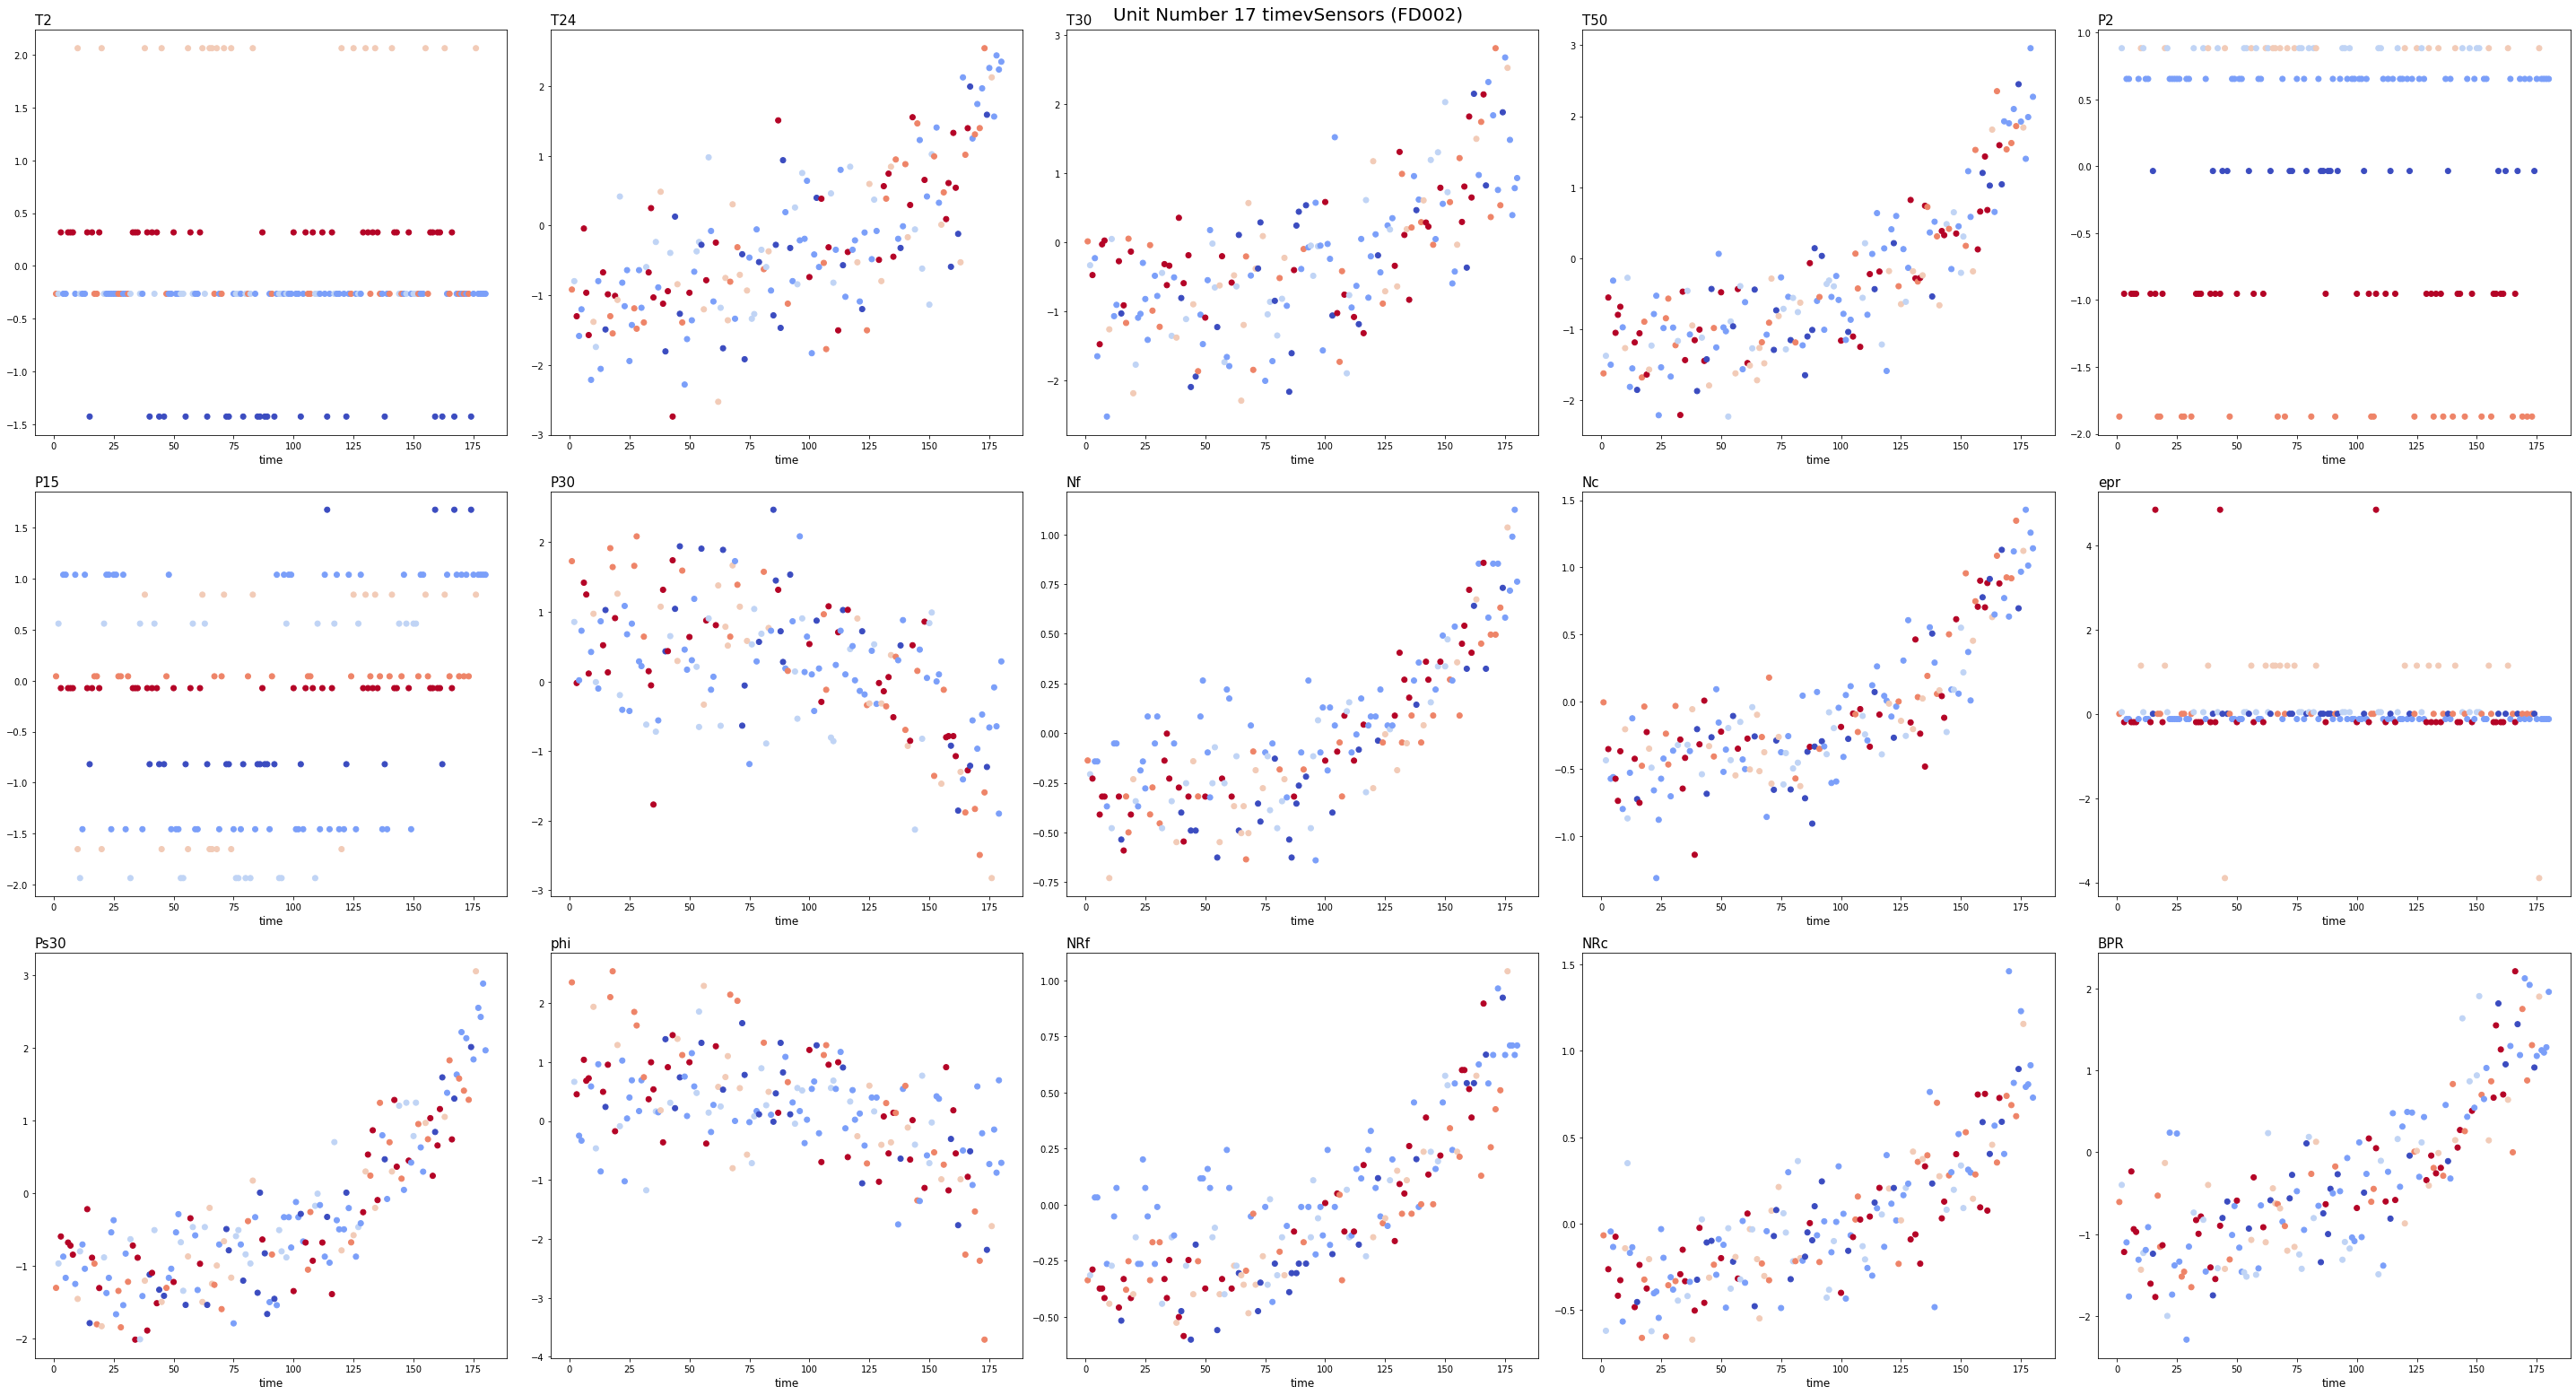

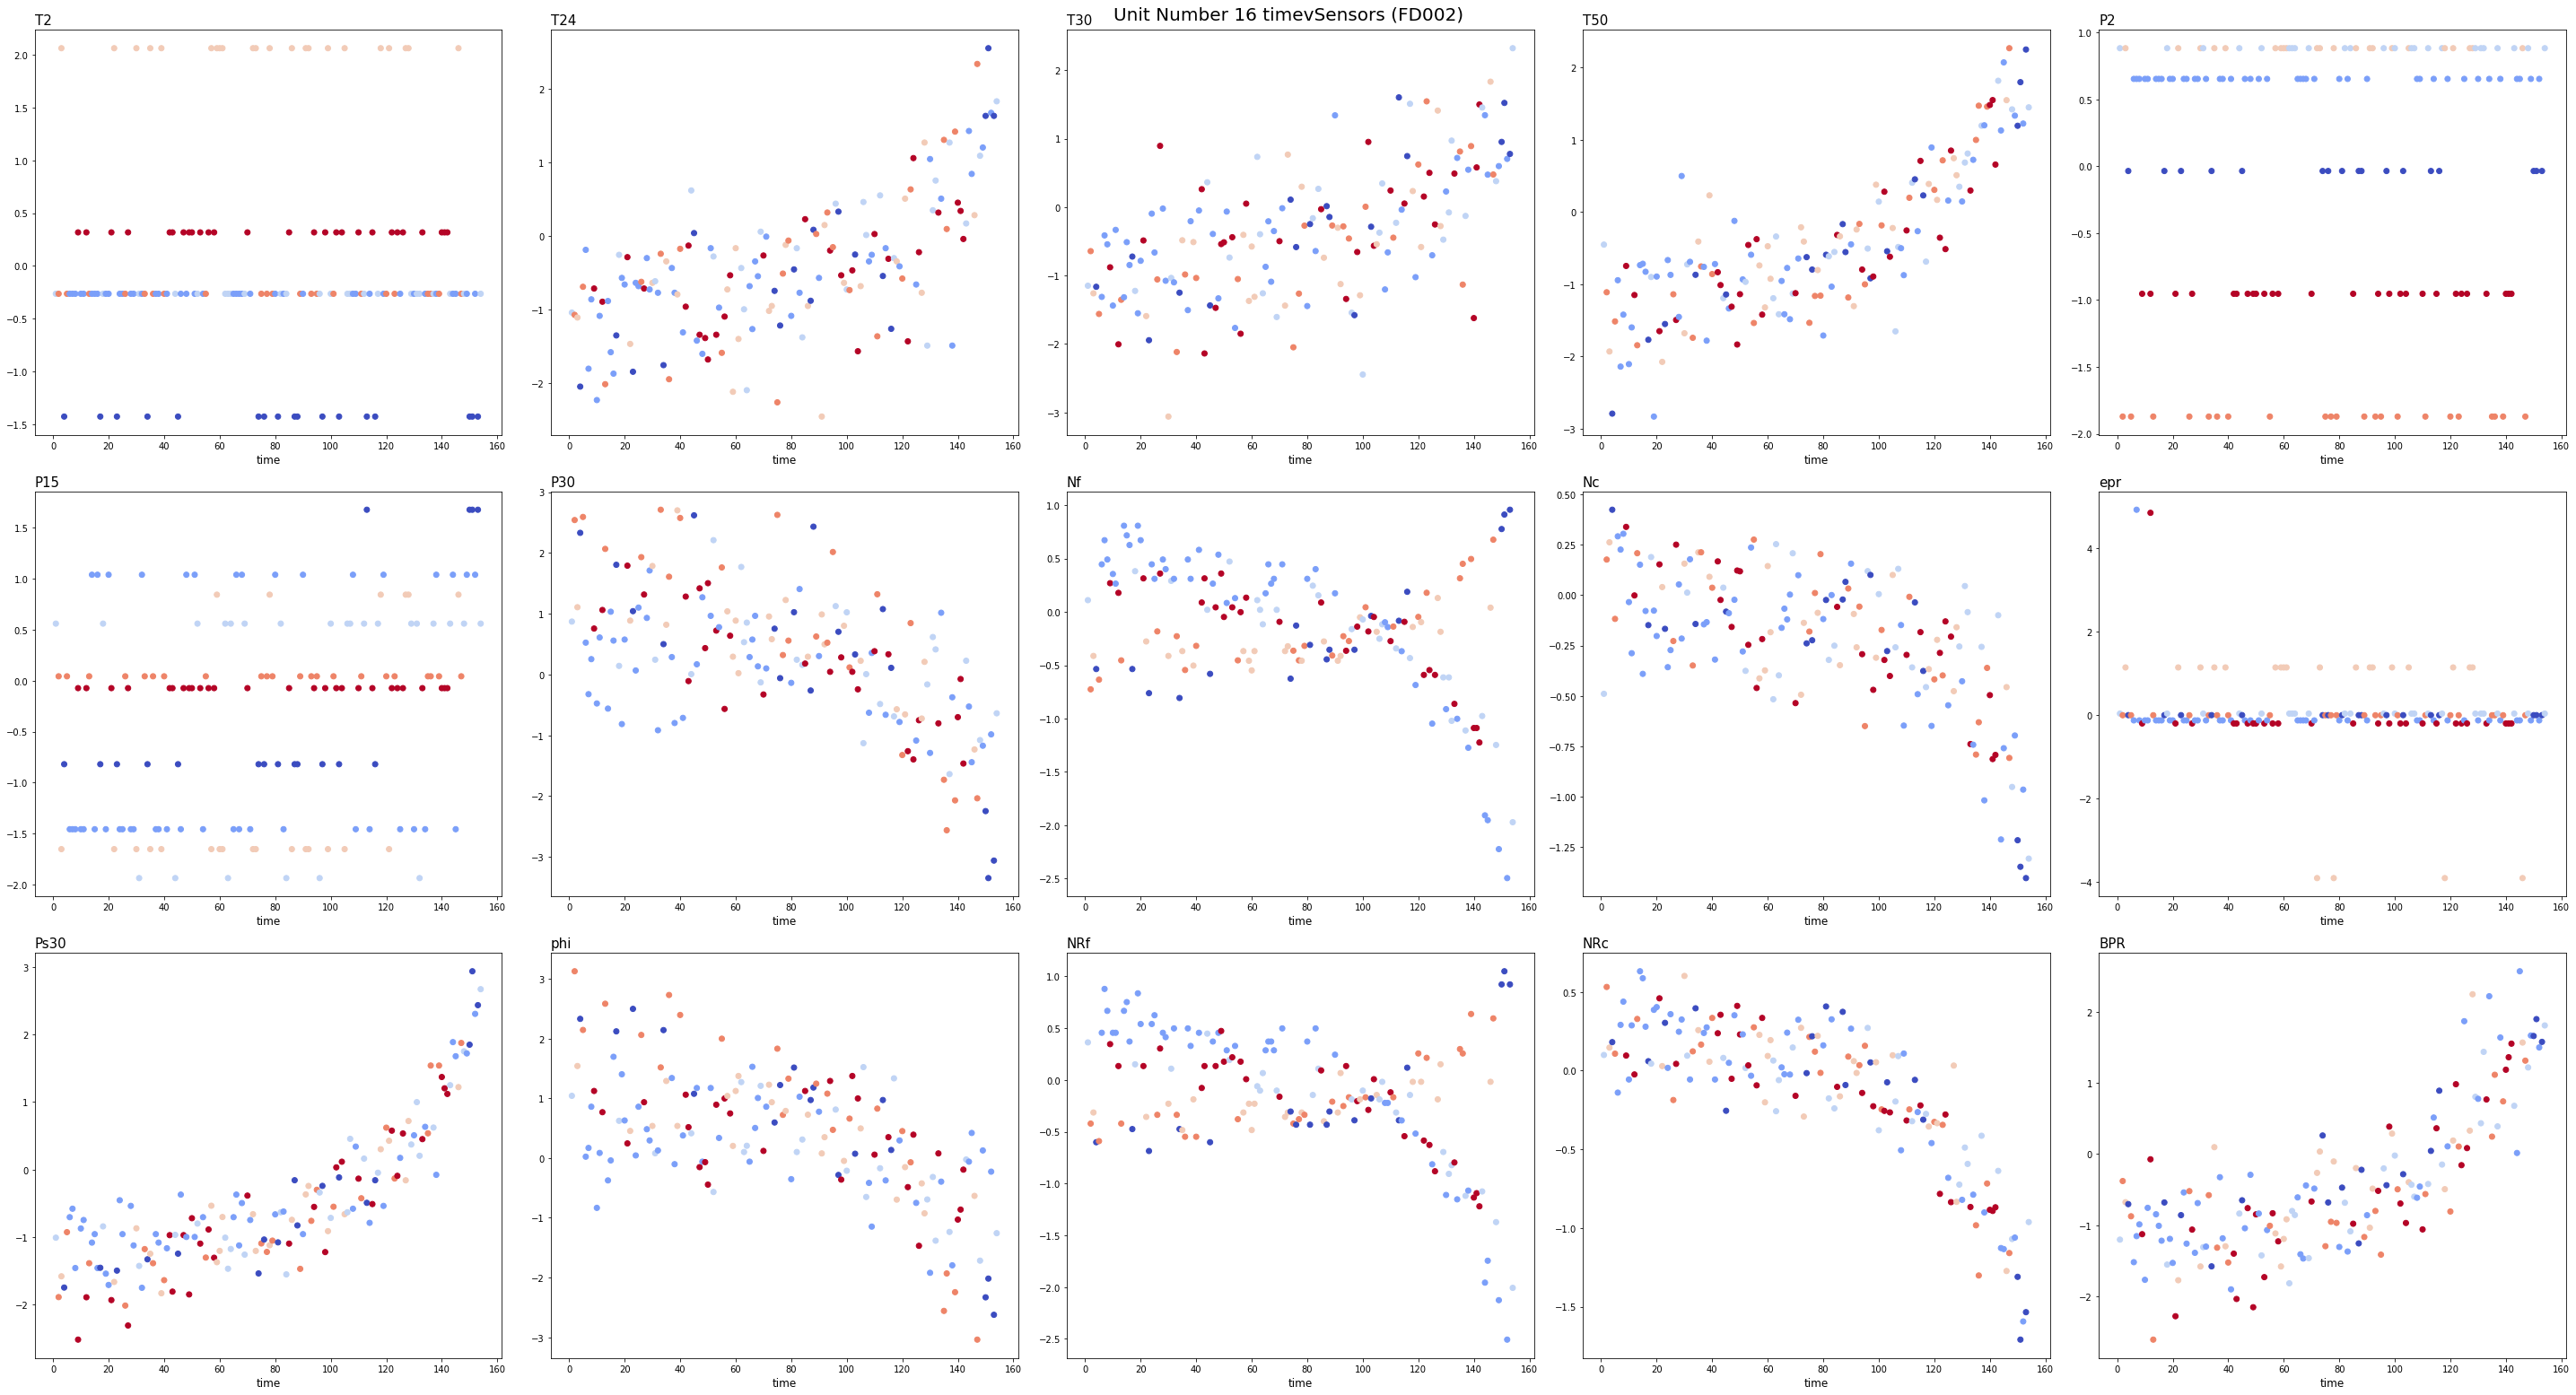

In [ ]:
for k in v:
    fig = plt.figure(figsize=(40,22))

    for i,x in zip(df_scaled.columns[5:],range(1,16)):

        ax = fig.add_subplot(3,5,x)
        
        ax.scatter(df_scaled.loc[(df_scaled["unit_number"]==k)]['time'],
                   df_scaled.loc[(df_scaled["unit_number"]==k)][i],
                   c=df_scaled.loc[(df_scaled["unit_number"]==k)]['cluster'],
                  cmap='coolwarm')
        ax.set_title(i,fontsize=15,loc="left")
        ax.set_xlabel("time",fontsize=12)



    fig.subplots_adjust(hspace=0.2)
    fig.suptitle(f'Unit Number {k} timevSensors (FD002)',fontsize=20)
#     plt.savefig(f"SubtractAVG Clustered DatasetFD002(UnitNumber-{k}).png")
    plt.tight_layout()
    plt.show()